# Cardiotocography Data Set
La cardiotocografia (CTG) viene utilizzata durante la gravidanza per monitorare la frequenza cardiaca del feto e le contrazioni uterine.
È utile a monitorare il benessere del feto e consente di individuare precocemente un'eventuale sofferenza fetale.

L'interpretazione della CTG aiuta a determinare se la gravidanza è ad alto o basso rischio.
Un CTG anormale può indicare la necessità di ulteriori indagini e di un potenziale intervento.

In questo Progeto eseguiremo l'EDA (Exploratory Data Analysis) e la modellazione

### Importo le librerie

In [3]:
## Importo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

### Carico i dati
I dati vengono forniti in un file Xls contenente 3 pagine.
Carichiamo i dati ed eliminiamo le colonne superflue.
Abbiamo deciso di eliminare la classificazione a 10 classi e di usare la classificazione a 3 classi (Normale, Sospetto e Patologgico).

In [4]:
# Carichiamo i dati
data = pd.read_excel('CTG.xls', header=0, sheet_name=2, skipfooter=3)
# elimino le colonne che non mi interessano insieme alla classificazione a 10 stati, usiamo quella a 3 stati
data.drop(columns=['FileName', 'Date', 'SegFile', 'LBE', 'b','e','A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP','CLASS', 'DR',], inplace=True)
data

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

**Attributi**

* **'baseline value'** - **'LB'** - FHR baseline (beats per minute)
* **'accelerations'** - **'AC'** - Number of accelerations per second
* **'fetal_movement'** - **'FM'** - Number of fetal movements per second
* **'uterine_contractions'** - **'UC'** - Number of uterine contractions per second
* **'light_decelerations'** - **'DL'** - Number of light decelerations per second
* **'severe_decelerations'** - **'DS'** - Number of severe decelerations per second
* **'prolongued_decelerations'** - **'DP'** - Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** - **'ASTV'** - Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** - **'MSTV'** - Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** - **'ALTV'** - Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** - **'MLTV'** - Mean value of long term variability 
* **'histogram_width'** - **'Width'** - Width of FHR histogram
* **'histogram_min' Minimum** - **'Min'** - (low frequency) of FHR histogram
* **'histogram_max' Maximum** - **'Max'** - (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** - **'Nmax'** - Number of histogram peaks
* **'histogram_number_of_zeroes'** - **'Nzeros'** - Number of histogram zeros
* **'histogram_mode'** - **'Mode'** - Histogram mode
* **'histogram_mean'** - **'Mean'** - Histogram mean
* **'histogram_median'** - **'Median'** - Histogram median
* **'histogram_variance'** - **'Variance'** - Histogram variance
* **'histogram_tendency'** - **'Tencency'** - Histogram tendency

**Target**
* **'NSP'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

### Controlliamo se abbiamo valori nulli e quanti ne abbiamo

In [6]:
#Controlliamo dei valori nulli per colonna
data.isna().sum()

LB          1
AC          1
FM          1
UC          1
ASTV        1
MSTV        1
ALTV        1
MLTV        1
DL          1
DS          1
DP          1
Width       1
Min         1
Max         1
Nmax        1
Nzeros      1
Mode        1
Mean        1
Median      1
Variance    1
Tendency    1
NSP         1
dtype: int64

In [7]:
# I valori nulli in totale risultano essere:
data.isna().any().sum()

22

### Creiamo una funzione "stupida" da comparare con la funzione isna()
#### La creiamo in modo che restituisca lo stesso output della funzione isna() subito sopra

In [8]:
# funzione che restituisce il numero totale di valori nulli presenti nel dataset
def func_findNullo(data):
    count = 0
    for i in data.columns:
        for j in data.index:
            if ((data[i][j] is np.nan) or (data[i][j] is pd.NA) or (data[i][j] is None) or (data[i][j] is np.datetime64('nat')) or (str(data[i][j]) == "nan")):
                count=count+1  
    return count

In [9]:
func_findNullo(data)

22

### Calcoliamo e compariamo i tempi di esecuzione delle due funzioni sopra citate

In [10]:
%timeit func_findNullo(data)

813 ms ± 7.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit data.isna().any().sum()

211 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
%reload_ext line_profiler

In [13]:
%lprun -f func_findNullo func_findNullo(data)

Timer unit: 1e-07 s

Total time: 3.22399 s

Could not find file C:\Users\am95g\AppData\Local\Temp\ipykernel_13904\683451630.py
Are you sure you are running this program from the same directory
that you ran the profiler from?
Continuing without the function's contents.

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           
     2         1         12.0     12.0      0.0  
     3        26        817.0     31.4      0.0  
     4     53200     196393.0      3.7      0.6  
     5     53175   32042531.0    602.6     99.4  
     6        25        161.0      6.4      0.0  
     7         1          3.0      3.0      0.0

In [14]:
%prun func_findNullo(data)

In [ ]:
         9624709 function calls in 2.421 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   265875    0.457    0.000    1.031    0.000 frame.py:3756(__getitem__)
   265875    0.341    0.000    1.214    0.000 series.py:966(__getitem__)
   531750    0.221    0.000    0.347    0.000 indexing.py:2656(check_deprecated_indexers)
  2658751    0.172    0.000    0.172    0.000 {built-in method builtins.isinstance}
   265875    0.170    0.000    0.584    0.000 series.py:1072(_get_value)
        1    0.170    0.170    2.421    2.421 683451630.py:1(func_findNullo)
   265875    0.121    0.000    0.242    0.000 base.py:5977(_get_values_for_loc)
   265875    0.114    0.000    0.172    0.000 range.py:385(get_loc)
   265875    0.110    0.000    0.128    0.000 base.py:5297(__contains__)
   531750    0.077    0.000    0.113    0.000 common.py:352(apply_if_callable)
   265875    0.068    0.000    0.107    0.000 series.py:708(_values)
   265875    0.067    0.000    0.088    0.000 frame.py:4271(_get_item_cache)
   265875    0.050    0.000    0.070    0.000 inference.py:325(is_hashable)
   265875    0.046    0.000    0.046    0.000 {method 'index' of 'range' objects}
   797625    0.043    0.000    0.043    0.000 {pandas._libs.lib.is_integer}
   531750    0.039    0.000    0.039    0.000 {built-in method builtins.hash}
   265875    0.039    0.000    0.039    0.000 managers.py:2066(internal_values)
   531750    0.036    0.000    0.036    0.000 {built-in method builtins.callable}
   265875    0.021    0.000    0.021    0.000 {method 'get' of 'dict' objects}
   265875    0.020    0.000    0.020    0.000 {pandas._libs.lib.is_scalar}
   265875    0.018    0.000    0.018    0.000 {pandas._libs.lib.item_from_zerodim}
   265875    0.017    0.000    0.017    0.000 {pandas._libs.lib.is_iterator}
    53200    0.006    0.000    0.006    0.000 range.py:433(__iter__)
        1    0.000    0.000    2.421    2.421 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 base.py:742(__iter__)
        3    0.000    0.000    0.000    0.000 base.py:5133(_values)
        1    0.000    0.000    2.421    2.421 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [15]:
%prun data.isna().any().sum()

In [ ]:
         904 function calls (896 primitive calls) in 0.001 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {method 'sort' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 missing.py:268(_isna_array)
        2    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.000    0.000    0.000    0.000 base.py:494(find)
      232    0.000    0.000    0.000    0.000 {built-in method builtins.isinstance}
      2/1    0.000    0.000    0.000    0.000 base.py:431(__new__)
        1    0.000    0.000    0.000    0.000 {pandas._libs.lib.maybe_convert_objects}
        1    0.000    0.000    0.000    0.000 base.py:1169(take)
        1    0.000    0.000    0.000    0.000 nanops.py:83(_f)
        1    0.000    0.000    0.001    0.001 frame.py:10770(_reduce)
        1    0.000    0.000    0.001    0.001 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 generic.py:259(__init__)
        2    0.000    0.000    0.000    0.000 managers.py:301(apply)
        3    0.000    0.000    0.000    0.000 generic.py:5844(__finalize__)
        1    0.000    0.000    0.000    0.000 managers.py:574(_combine)
        4    0.000    0.000    0.000    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.001    0.001 generic.py:11108(_logical_func)
       22    0.000    0.000    0.000    0.000 base.py:229(construct_from_string)
        2    0.000    0.000    0.000    0.000 nanops.py:261(_get_values)
        3    0.000    0.000    0.000    0.000 common.py:1751(pandas_dtype)
        4    0.000    0.000    0.000    0.000 blocks.py:2172(new_block)
        4    0.000    0.000    0.000    0.000 {built-in method numpy.seterrobj}
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        4    0.000    0.000    0.000    0.000 _ufunc_config.py:32(seterr)
        1    0.000    0.000    0.000    0.000 frame.py:3701(_ixs)
        1    0.000    0.000    0.000    0.000 frame.py:6374(isna)
    36/29    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 series.py:4773(_reduce)
        1    0.000    0.000    0.001    0.001 managers.py:1543(reduce)
        1    0.000    0.000    0.000    0.000 construction.py:493(sanitize_array)
        1    0.000    0.000    0.000    0.000 indexing.py:1592(_getitem_axis)
        2    0.000    0.000    0.000    0.000 managers.py:1063(from_blocks)
        4    0.000    0.000    0.000    0.000 config.py:116(_get_single_key)
        5    0.000    0.000    0.000    0.000 blocks.py:2091(maybe_coerce_values)
        2    0.000    0.000    0.000    0.000 frame.py:608(__init__)
        1    0.000    0.000    0.000    0.000 common.py:537(is_string_or_object_np_dtype)
        1    0.000    0.000    0.000    0.000 missing.py:191(_isna)
        4    0.000    0.000    0.000    0.000 blocks.py:2120(get_block_type)
        1    0.000    0.000    0.000    0.000 cast.py:1763(construct_1d_object_array_from_listlike)
       26    0.000    0.000    0.000    0.000 generic.py:40(_check)
        1    0.000    0.000    0.000    0.000 generic.py:11443(_min_count_stat_function)
        1    0.000    0.000    0.000    0.000 base.py:141(isna)
       26    0.000    0.000    0.000    0.000 generic.py:45(_instancecheck)
        1    0.000    0.000    0.000    0.000 {pandas._libs.lib.get_reverse_indexer}
        4    0.000    0.000    0.000    0.000 common.py:1278(is_bool_dtype)
        9    0.000    0.000    0.000    0.000 common.py:1591(_is_dtype_type)
        2    0.000    0.000    0.000    0.000 {method 'copy' of 'numpy.ndarray' objects}
        3    0.000    0.000    0.000    0.000 generic.py:5904(__setattr__)
        4    0.000    0.000    0.000    0.000 _ufunc_config.py:131(geterr)
        2    0.000    0.000    0.000    0.000 base.py:691(_simple_new)
        1    0.000    0.000    0.000    0.000 base.py:7439(_maybe_cast_data_without_dtype)
        1    0.000    0.000    0.000    0.000 managers.py:1080(fast_xs)
        1    0.000    0.000    0.000    0.000 blocks.py:345(apply)
        1    0.000    0.000    0.000    0.000 numeric.py:289(full)
        3    0.000    0.000    0.000    0.000 blocks.py:221(make_block)
        4    0.000    0.000    0.000    0.000 config.py:597(_get_root)
        1    0.000    0.000    0.000    0.000 generic.py:6076(astype)
        1    0.000    0.000    0.000    0.000 indexing.py:1059(__getitem__)
        4    0.000    0.000    0.000    0.000 blocks.py:2186(check_ndim)
        8    0.000    0.000    0.000    0.000 config.py:611(_get_deprecated_option)
        4    0.000    0.000    0.000    0.000 managers.py:2427(_using_copy_on_write)
        1    0.000    0.000    0.000    0.000 nanops.py:588(nansum)
        1    0.000    0.000    0.000    0.000 blocks.py:376(_split_op_result)
        1    0.000    0.000    0.000    0.000 astype.py:239(astype_array_safe)
        2    0.000    0.000    0.000    0.000 series.py:342(__init__)
        1    0.000    0.000    0.000    0.000 nanops.py:496(nanany)
       34    0.000    0.000    0.000    0.000 {built-in method builtins.getattr}
        2    0.000    0.000    0.000    0.000 {built-in method numpy.empty}
        4    0.000    0.000    0.000    0.000 config.py:134(_get_option)
        1    0.000    0.000    0.000    0.000 {method 'any' of 'numpy.ndarray' objects}
        2    0.000    0.000    0.000    0.000 dtypes.py:1185(construct_from_string)
        1    0.000    0.000    0.000    0.000 blocks.py:504(astype)
        3    0.000    0.000    0.000    0.000 series.py:661(name)
        2    0.000    0.000    0.000    0.000 dtypes.py:754(construct_from_string)
        2    0.000    0.000    0.000    0.000 common.py:235(asarray_tuplesafe)
        2    0.000    0.000    0.000    0.000 managers.py:1888(__init__)
        2    0.000    0.000    0.000    0.000 blocks.py:2250(extend_blocks)
        5    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_scalar}
        1    0.000    0.000    0.000    0.000 fromnumeric.py:852(sort)
        2    0.000    0.000    0.000    0.000 dtype.py:125(construct_from_string)
        1    0.000    0.000    0.000    0.000 _methods.py:54(_any)
        2    0.000    0.000    0.000    0.000 dtypes.py:913(construct_from_string)
        2    0.000    0.000    0.000    0.000 _ufunc_config.py:429(__enter__)
        7    0.000    0.000    0.000    0.000 construction.py:461(ensure_wrapped_if_datetimelike)
        4    0.000    0.000    0.000    0.000 flags.py:49(__init__)
        1    0.000    0.000    0.000    0.000 algorithms.py:1480(take)
        1    0.000    0.000    0.001    0.001 generic.py:11166(any)
        4    0.000    0.000    0.000    0.000 config.py:262(__call__)
        2    0.000    0.000    0.000    0.000 common.py:684(is_integer_dtype)
        1    0.000    0.000    0.000    0.000 blocks.py:355(reduce)
        3    0.000    0.000    0.000    0.000 {built-in method numpy.asarray}
        1    0.000    0.000    0.000    0.000 base.py:589(_dtype_to_subclass)
        1    0.000    0.000    0.000    0.000 managers.py:1572(<listcomp>)
        1    0.000    0.000    0.000    0.000 common.py:1433(is_extension_array_dtype)
        2    0.000    0.000    0.000    0.000 nanops.py:350(_na_ok_dtype)
        2    0.000    0.000    0.000    0.000 dtype.py:216(construct_from_string)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        1    0.000    0.000    0.000    0.000 frame.py:10816(blk_func)
        3    0.000    0.000    0.000    0.000 generic.py:550(_get_axis_number)
        1    0.000    0.000    0.000    0.000 base.py:54(shape)
        1    0.000    0.000    0.001    0.001 _decorators.py:323(wrapper)
        3    0.000    0.000    0.000    0.000 common.py:1246(is_float_dtype)
        1    0.000    0.000    0.000    0.000 base.py:5347(__getitem__)
        2    0.000    0.000    0.000    0.000 base.py:7415(maybe_extract_name)
        3    0.000    0.000    0.000    0.000 flags.py:85(allows_duplicate_labels)
        3    0.000    0.000    0.000    0.000 range.py:946(__len__)
        1    0.000    0.000    0.000    0.000 construction.py:744(_try_cast)
        4    0.000    0.000    0.000    0.000 nanops.py:86(<genexpr>)
        1    0.000    0.000    0.000    0.000 nanops.py:403(new_func)
        3    0.000    0.000    0.000    0.000 series.py:611(name)
       11    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
        1    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 config.py:579(_select_options)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
        2    0.000    0.000    0.000    0.000 string_.py:118(construct_from_string)
        1    0.000    0.000    0.000    0.000 {method 'take' of 'numpy.ndarray' objects}
        6    0.000    0.000    0.000    0.000 common.py:1556(get_dtype)
        3    0.000    0.000    0.000    0.000 construction.py:399(extract_array)
        1    0.000    0.000    0.000    0.000 nanops.py:1453(_maybe_null_out)
        2    0.000    0.000    0.000    0.000 generic.py:5888(__getattr__)
        2    0.000    0.000    0.000    0.000 _validators.py:226(validate_bool_kwarg)
        1    0.000    0.000    0.000    0.000 astype.py:192(astype_array)
        5    0.000    0.000    0.000    0.000 common.py:1154(needs_i8_conversion)
        6    0.000    0.000    0.000    0.000 inference.py:325(is_hashable)
        1    0.000    0.000    0.000    0.000 indexing.py:1539(_validate_integer)
        2    0.000    0.000    0.000    0.000 managers.py:2066(internal_values)
       23    0.000    0.000    0.000    0.000 {built-in method builtins.issubclass}
        2    0.000    0.000    0.000    0.000 dtypes.py:303(construct_from_string)
        5    0.000    0.000    0.000    0.000 {built-in method builtins.all}
        5    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_list_like}
        3    0.000    0.000    0.000    0.000 base.py:926(__len__)
        1    0.000    0.000    0.000    0.000 generic.py:11492(sum)
        4    0.000    0.000    0.000    0.000 config.py:650(_warn_if_deprecated)
        1    0.000    0.000    0.000    0.000 frame.py:11033(_get_agg_axis)
        1    0.000    0.000    0.000    0.000 indexing.py:139(iloc)
        1    0.000    0.000    0.000    0.000 {method 'sum' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(sort)
        1    0.000    0.000    0.001    0.001 generic.py:11598(any)
        2    0.000    0.000    0.000    0.000 common.py:162(is_object_dtype)
        3    0.000    0.000    0.000    0.000 nanops.py:79(check)
        1    0.000    0.000    0.000    0.000 generic.py:564(_get_axis)
        2    0.000    0.000    0.000    0.000 series.py:708(_values)
        4    0.000    0.000    0.000    0.000 common.py:1487(is_ea_or_datetimelike_dtype)
        1    0.000    0.000    0.000    0.000 inference.py:266(is_dict_like)
        2    0.000    0.000    0.000    0.000 frame.py:599(_constructor)
        2    0.000    0.000    0.000    0.000 _ufunc_config.py:425(__init__)
        2    0.000    0.000    0.000    0.000 _ufunc_config.py:434(__exit__)
        6    0.000    0.000    0.000    0.000 common.py:1744(<genexpr>)
        3    0.000    0.000    0.000    0.000 common.py:1725(validate_all_hashable)
        1    0.000    0.000    0.000    0.000 common.py:96(is_bool_indexer)
        2    0.000    0.000    0.000    0.000 nanops.py:217(_maybe_get_mask)
        1    0.000    0.000    0.000    0.000 blocks.py:544(copy)
        4    0.000    0.000    0.000    0.000 common.py:151(classes_and_not_datetimelike)
        3    0.000    0.000    0.000    0.000 generic.py:332(attrs)
        1    0.000    0.000    0.000    0.000 managers.py:449(astype)
        1    0.000    0.000    0.000    0.000 managers.py:1914(from_blocks)
        8    0.000    0.000    0.000    0.000 {built-in method numpy.geterrobj}
        1    0.000    0.000    0.000    0.000 common.py:585(is_dtype_equal)
        1    0.000    0.000    0.000    0.000 nanops.py:469(newfunc)
        1    0.000    0.000    0.000    0.000 generic.py:11777(sum)
        1    0.000    0.000    0.000    0.000 indexing.py:2656(check_deprecated_indexers)
        2    0.000    0.000    0.000    0.000 managers.py:275(arrays)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1017(_handle_fromlist)
        5    0.000    0.000    0.000    0.000 common.py:148(<lambda>)
        1    0.000    0.000    0.000    0.000 missing.py:108(isna)
        2    0.000    0.000    0.000    0.000 base.py:163(array)
        2    0.000    0.000    0.000    0.000 {method 'match' of 're.Pattern' objects}
        1    0.000    0.000    0.000    0.000 common.py:641(resolve_numeric_only)
        4    0.000    0.000    0.000    0.000 {method 'split' of 'str' objects}
        6    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 {pandas._libs.algos.ensure_platform_int}
        4    0.000    0.000    0.000    0.000 config.py:638(_translate_key)
        1    0.000    0.000    0.000    0.000 common.py:352(is_datetime64tz_dtype)
        1    0.000    0.000    0.000    0.000 frame.py:1497(__len__)
        6    0.000    0.000    0.000    0.000 generic.py:353(flags)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.any}
        4    0.000    0.000    0.000    0.000 common.py:1420(is_1d_only_ea_dtype)
        1    0.000    0.000    0.000    0.000 construction.py:676(_sanitize_ndim)
        1    0.000    0.000    0.000    0.000 common.py:151(cast_scalar_indexer)
        2    0.000    0.000    0.000    0.000 base.py:556(<genexpr>)
        2    0.000    0.000    0.000    0.000 base.py:871(_reset_identity)
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_bool}
        5    0.000    0.000    0.000    0.000 common.py:146(classes)
        4    0.000    0.000    0.000    0.000 common.py:156(<lambda>)
        2    0.000    0.000    0.000    0.000 inference.py:188(is_array_like)
        1    0.000    0.000    0.000    0.000 base.py:313(shape)
        2    0.000    0.000    0.000    0.000 generic.py:664(ndim)
        1    0.000    0.000    0.000    0.000 common.py:790(is_unsigned_integer_dtype)
        3    0.000    0.000    0.000    0.000 inference.py:292(<genexpr>)
        1    0.000    0.000    0.000    0.000 frame.py:873(shape)
        3    0.000    0.000    0.000    0.000 blocks.py:213(mgr_locs)
        2    0.000    0.000    0.000    0.000 blocks.py:823(shape)
        1    0.000    0.000    0.000    0.000 blocks.py:827(iget)
        3    0.000    0.000    0.000    0.000 base.py:56(<genexpr>)
        6    0.000    0.000    0.000    0.000 {built-in method builtins.hash}
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_integer}
        1    0.000    0.000    0.000    0.000 inspect.py:72(isclass)
        1    0.000    0.000    0.000    0.000 base.py:286(is_dtype)
        2    0.000    0.000    0.000    0.000 function.py:56(__call__)
        2    0.000    0.000    0.000    0.000 nanops.py:195(_get_fill_value)
        3    0.000    0.000    0.000    0.000 flags.py:53(allows_duplicate_labels)
        1    0.000    0.000    0.000    0.000 managers.py:238(items)
        1    0.000    0.000    0.000    0.000 generic.py:4114(_set_is_copy)
        2    0.000    0.000    0.000    0.000 managers.py:330(<dictcomp>)
        2    0.000    0.000    0.000    0.000 managers.py:999(__init__)
        2    0.000    0.000    0.000    0.000 {method 'search' of 're.Pattern' objects}
        1    0.000    0.000    0.000    0.000 common.py:319(is_datetime64_dtype)
        1    0.000    0.000    0.000    0.000 common.py:736(is_signed_integer_dtype)
        1    0.000    0.000    0.000    0.000 common.py:352(apply_if_callable)
        1    0.000    0.000    0.000    0.000 base.py:575(_ensure_array)
        2    0.000    0.000    0.000    0.000 managers.py:287(<listcomp>)
        1    0.000    0.000    0.000    0.000 managers.py:589(<listcomp>)
        2    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x00007FFC0BA1C810}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.asanyarray}
        1    0.000    0.000    0.000    0.000 fromnumeric.py:848(_sort_dispatcher)
        1    0.000    0.000    0.000    0.000 _methods.py:46(_sum)
        1    0.000    0.000    0.000    0.000 common.py:393(is_timedelta64_dtype)
        1    0.000    0.000    0.000    0.000 utils.py:66(is_list_like_indexer)
        1    0.000    0.000    0.000    0.000 nanops.py:1492(check_below_min_count)
        1    0.000    0.000    0.000    0.000 base.py:5133(_values)
        4    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        2    0.000    0.000    0.000    0.000 multiarray.py:148(concatenate)
        1    0.000    0.000    0.000    0.000 multiarray.py:1071(copyto)
        1    0.000    0.000    0.000    0.000 construction.py:713(_sanitize_str_dtypes)
        1    0.000    0.000    0.000    0.000 base.py:1735(name)
        1    0.000    0.000    0.000    0.000 blocks.py:217(mgr_locs)
        1    0.000    0.000    0.000    0.000 managers.py:2006(_block)
        1    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'lower' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.callable}
        1    0.000    0.000    0.000    0.000 base.py:1195(_maybe_disallow_fill)
        1    0.000    0.000    0.000    0.000 series.py:546(_constructor)
        1    0.000    0.000    0.000    0.000 {method 'extend' of 'list' objects}
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_iterator}
        1    0.000    0.000    0.000    0.000 base.py:242(disallow_kwargs)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_float}
        1    0.000    0.000    0.000    0.000 typing.py:1146(cast)
        1    0.000    0.000    0.000    0.000 construction.py:733(_maybe_repeat)
        1    0.000    0.000    0.000    0.000 {pandas._libs.lib.item_from_zerodim}

### Analizziamo i valori nulli che trovati

In [17]:
# Verifichiamo come sono distribuiti i null in quanto, vedendo il file Xls, esso presenta una riga vuota
data[data['NSP'].isna()]

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# cancelliamo i valori nulli che nel caso nostro corrispondono ad una linea del dataframe
data = data.dropna()

### Analizzaimo eventuali duplicati

In [20]:
# Vediamo se ci sono duplicati e quanti sono
data.duplicated().sum()

14

In [21]:
# Cancelliamo i duplicati trovati
data = data.drop_duplicates()

### Risultato finale del nostro DataSet

In [24]:
# qudini ciò che rimane risulta essere:
data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [25]:
data.tail()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2126,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [26]:
data.shape

(2112, 22)

# Exploratory Data Analysis

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2112.0,133.296875,9.833066,106.0,126.0,133.0,140.0,160.0
AC,2112.0,2.733902,3.567741,0.0,0.0,1.0,4.0,26.0
FM,2112.0,7.267992,37.244378,0.0,0.0,0.0,2.0,564.0
UC,2112.0,3.678504,2.844685,0.0,1.0,3.0,5.0,23.0
ASTV,2112.0,46.978693,17.167716,12.0,32.0,49.0,61.0,87.0
MSTV,2112.0,1.335559,0.884232,0.2,0.7,1.2,1.7,7.0
ALTV,2112.0,9.759943,18.270136,0.0,0.0,0.0,11.0,91.0
MLTV,2112.0,8.169176,5.633034,0.0,4.6,7.4,10.8,50.7
DL,2112.0,1.580492,2.504219,0.0,0.0,0.0,3.0,16.0
DS,2112.0,0.003314,0.057489,0.0,0.0,0.0,0.0,1.0


In [22]:
# Vediamo quante istanse abbiamo per ogni classe NSP
data['NSP'].value_counts()

1.0    1646
2.0     292
3.0     174
Name: NSP, dtype: int64

### Analisi sbilanciamenti

Prima di tutto valutiamo l'obiettivo e scopriamo se i nostri dati sono sbilanciati

([<matplotlib.axis.XTick at 0x17c6747c250>,
 [Text(0, 0, 'Normale'), Text(1, 0, 'Sospetto'), Text(2, 0, 'Patologico')])

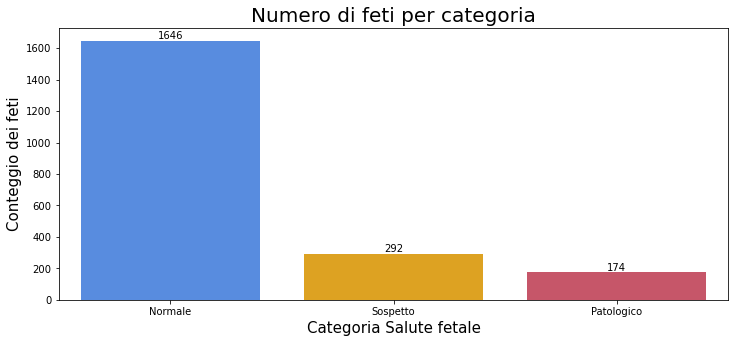

In [28]:
plt.figure(figsize=(12,5))
colours=["#4287f5","#fcad03", "#d9435c"]
ax = sns.countplot(data= data, x="NSP",palette=colours)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Numero di feti per categoria', fontsize=20)
plt.xlabel('Categoria Salute fetale', fontsize=15)
plt.ylabel('Conteggio dei feti', fontsize=15);
x = [0, 1, 2]
x_labels = ["Normale", "Sospetto", "Patologico"]
plt.xticks(x, x_labels)

Il grafico del conteggio degli obiettivi ci indica un evidente squilibrio nei dati a favore della prima categoria rispetto alle restanti due.

### Rappresentazione di tutti gli attributi del DataSet

Tracciamo un istogramma per ogni feature per vedere come sono distribuite in relazione al numero dei feti

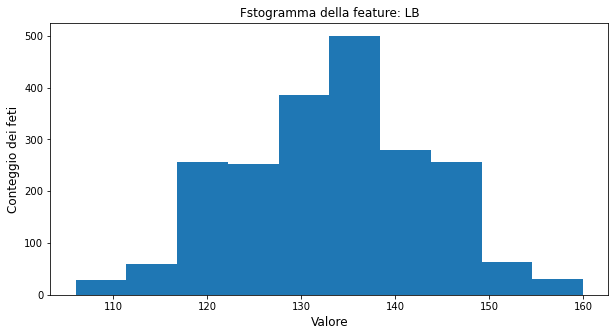

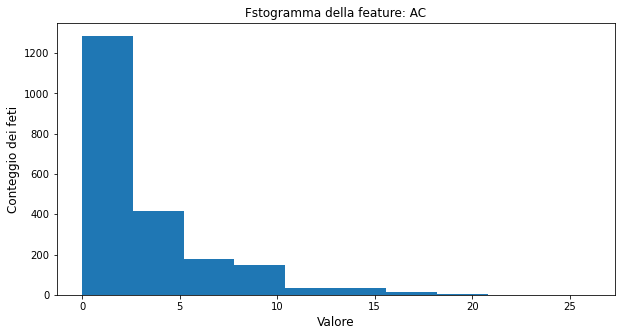

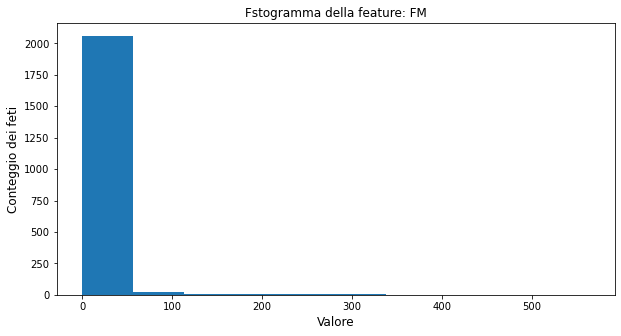

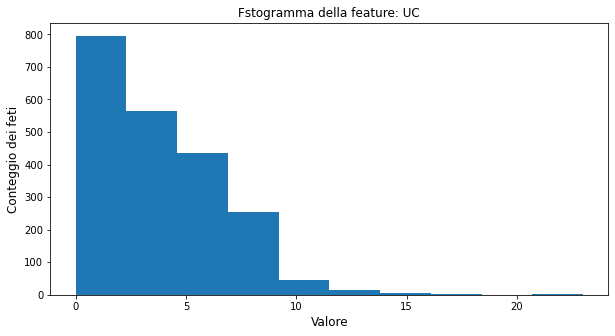

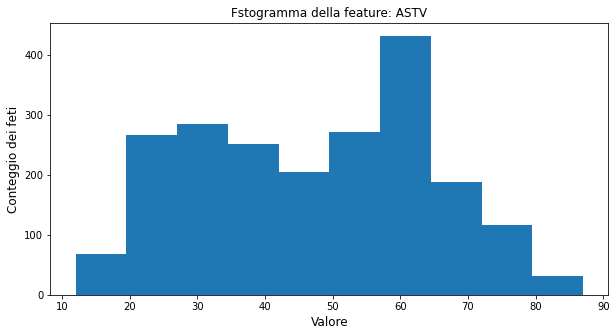

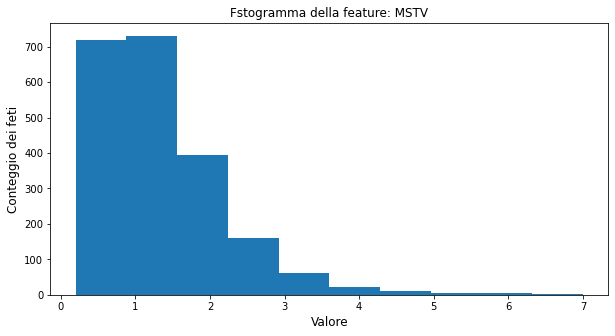

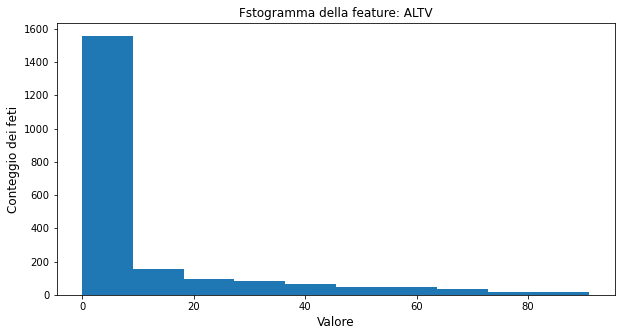

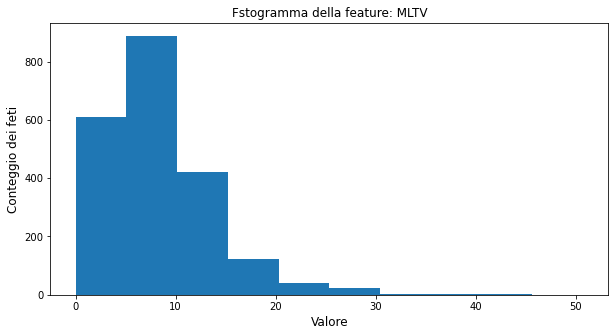

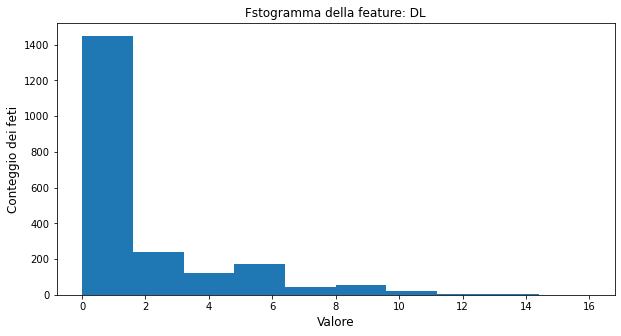

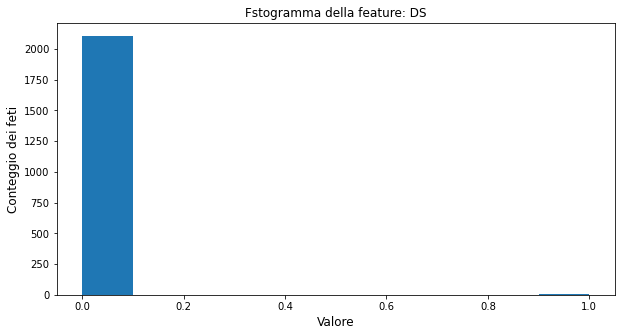

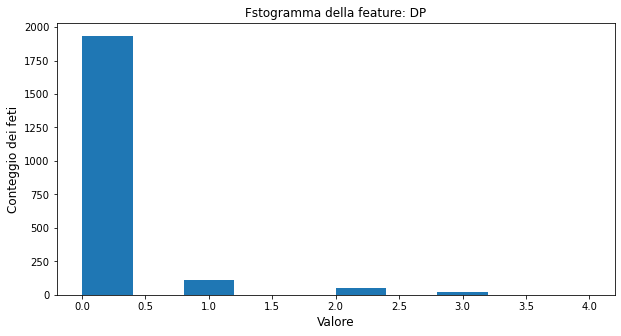

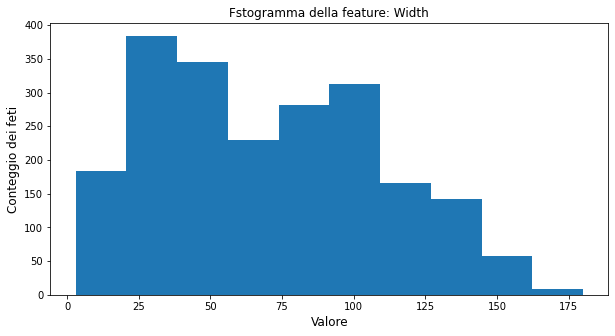

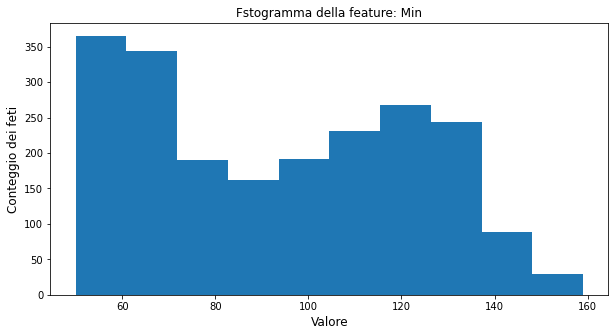

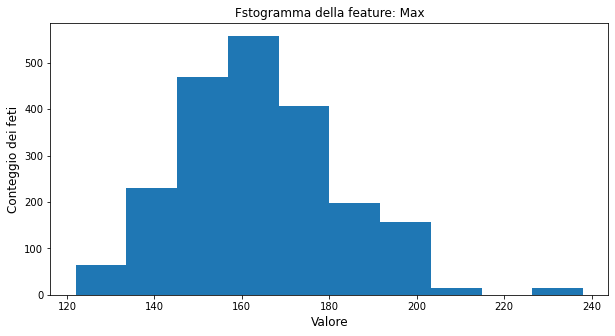

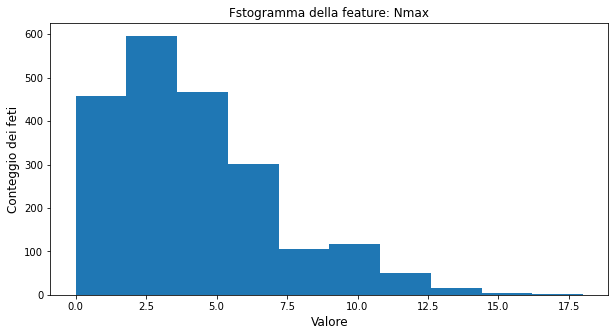

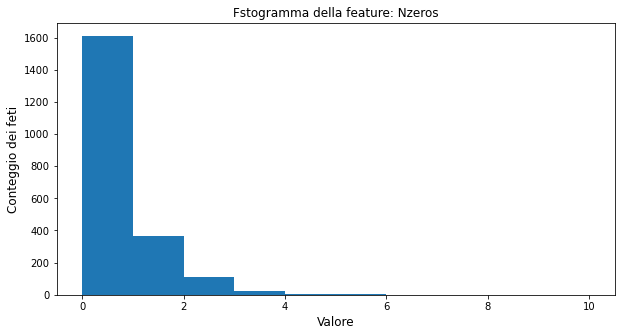

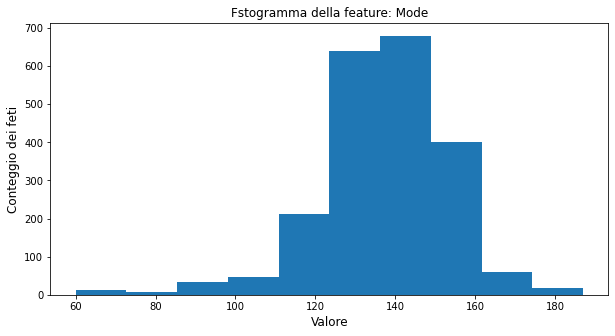

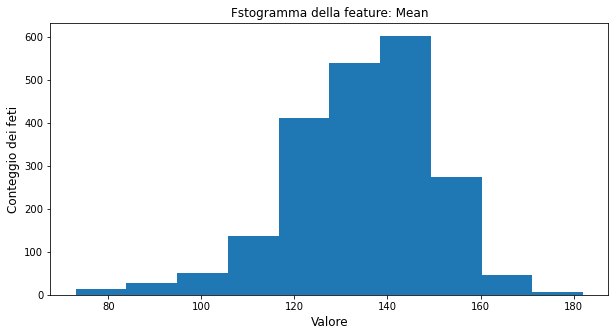

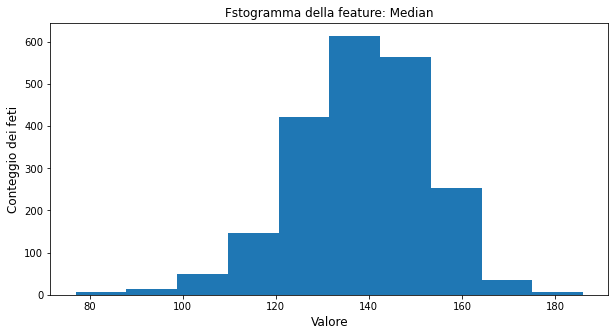

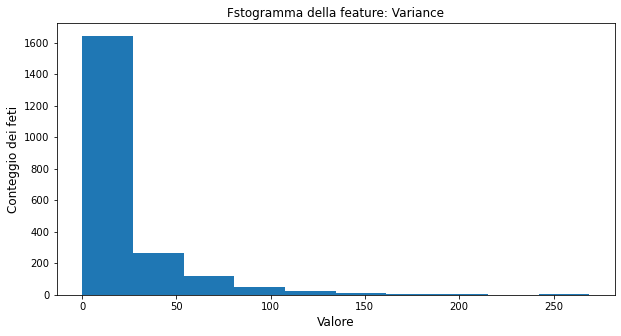

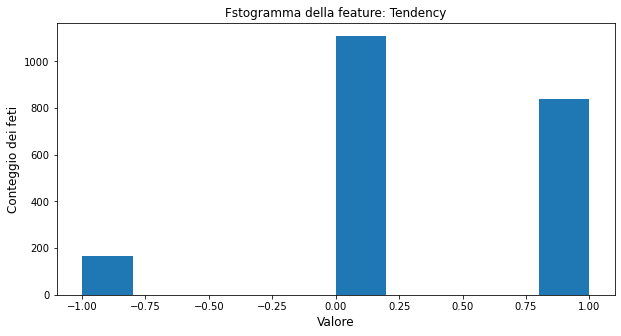

In [32]:
for col in data.columns:
    if str(col) != "NSP":
        plt.figure(figsize=(10,5))
        # Creo un istogramma per colonna
        data[col].plot.hist()
        # Setto il titolo
        plt.title(f"Fstogramma della feature: {col}")
        plt.xlabel('Valore', fontsize=12)
        plt.ylabel('Conteggio dei feti', fontsize=12);
        plt.show()

Per alcune delle caratteristiche (AC, FM, ALTV, DL, DS, DP, Nzeros e Variance) quasi la totalità dei feti risulta avere valori molto simili, per i restanti paramentri, invece, i valori risultano essere abbastanza differenziati.

### Prima Analisi sulla distribuzione della frequenza cardiaca basale (LB) in relazione a salute del feto (NSP)

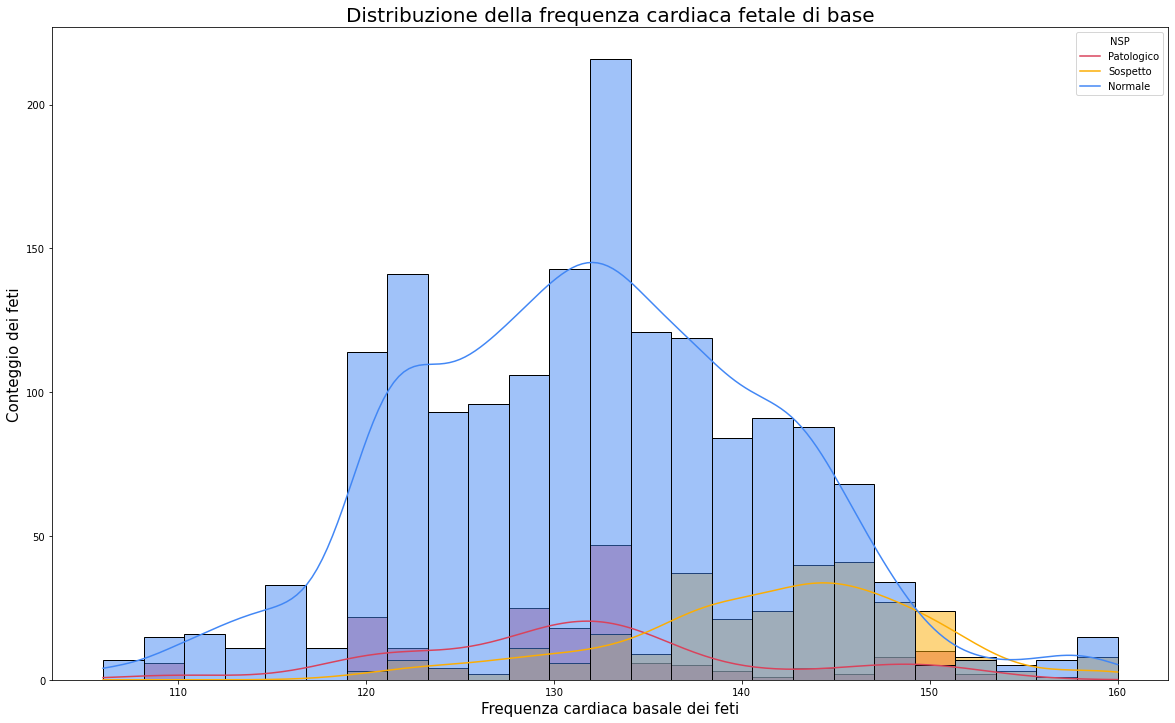

In [33]:
plt.figure(figsize=(20,12))
g = sns.histplot(data=data, x='LB', hue='NSP', kde=True, palette=colours)
plt.title('Distribuzione della frequenza cardiaca fetale di base', fontsize=20)
plt.xlabel('Frequenza cardiaca basale dei feti', fontsize=15)
plt.ylabel('Conteggio dei feti', fontsize=15);
n_labels = ["Patologico","Sospetto", "Normale"]
plt.legend(labels = n_labels, title="NSP")

Dal precedente grafico possiamo evincere che nelle zone centrali del valore della frequenza cardiaca basale (120-140 battiti con picco poco sopra i 130 battiti) risultano essere la maggior parte dei feti con salute classificata come "Normale" e "Patologica"; invece, la maggior parte dei feti con salute classificata come "Sospetta" risultano essere nella fascia 140-150 battiti

### Analisi statistiche

#### Calcoliamo la media statistica, in funzione dell'NSP, di ogni parametro che abbiamo

In [34]:
data_mean_NSP = data.groupby('NSP').mean()
data_mean_NSP.T

NSP,1.0,2.0,3.0
LB,131.998177,141.650685,131.563218
AC,3.434386,0.215753,0.333333
FM,6.401580,7.065068,15.804598
UC,4.001215,2.085616,3.298851
ASTV,42.501823,61.791096,64.471264
MSTV,1.431713,0.642123,1.589655
ALTV,5.059538,28.832192,22.218391
MLTV,8.679891,8.028425,3.574138
DL,1.618469,0.407534,3.189655
DS,0.000608,0.000000,0.034483


Ora vediamo questi dati rapprentati attraverso gli istogrammi

Text(0.5, 1.01, 'media statistica in funzione del NSP di ogni parametro che abbiamo')

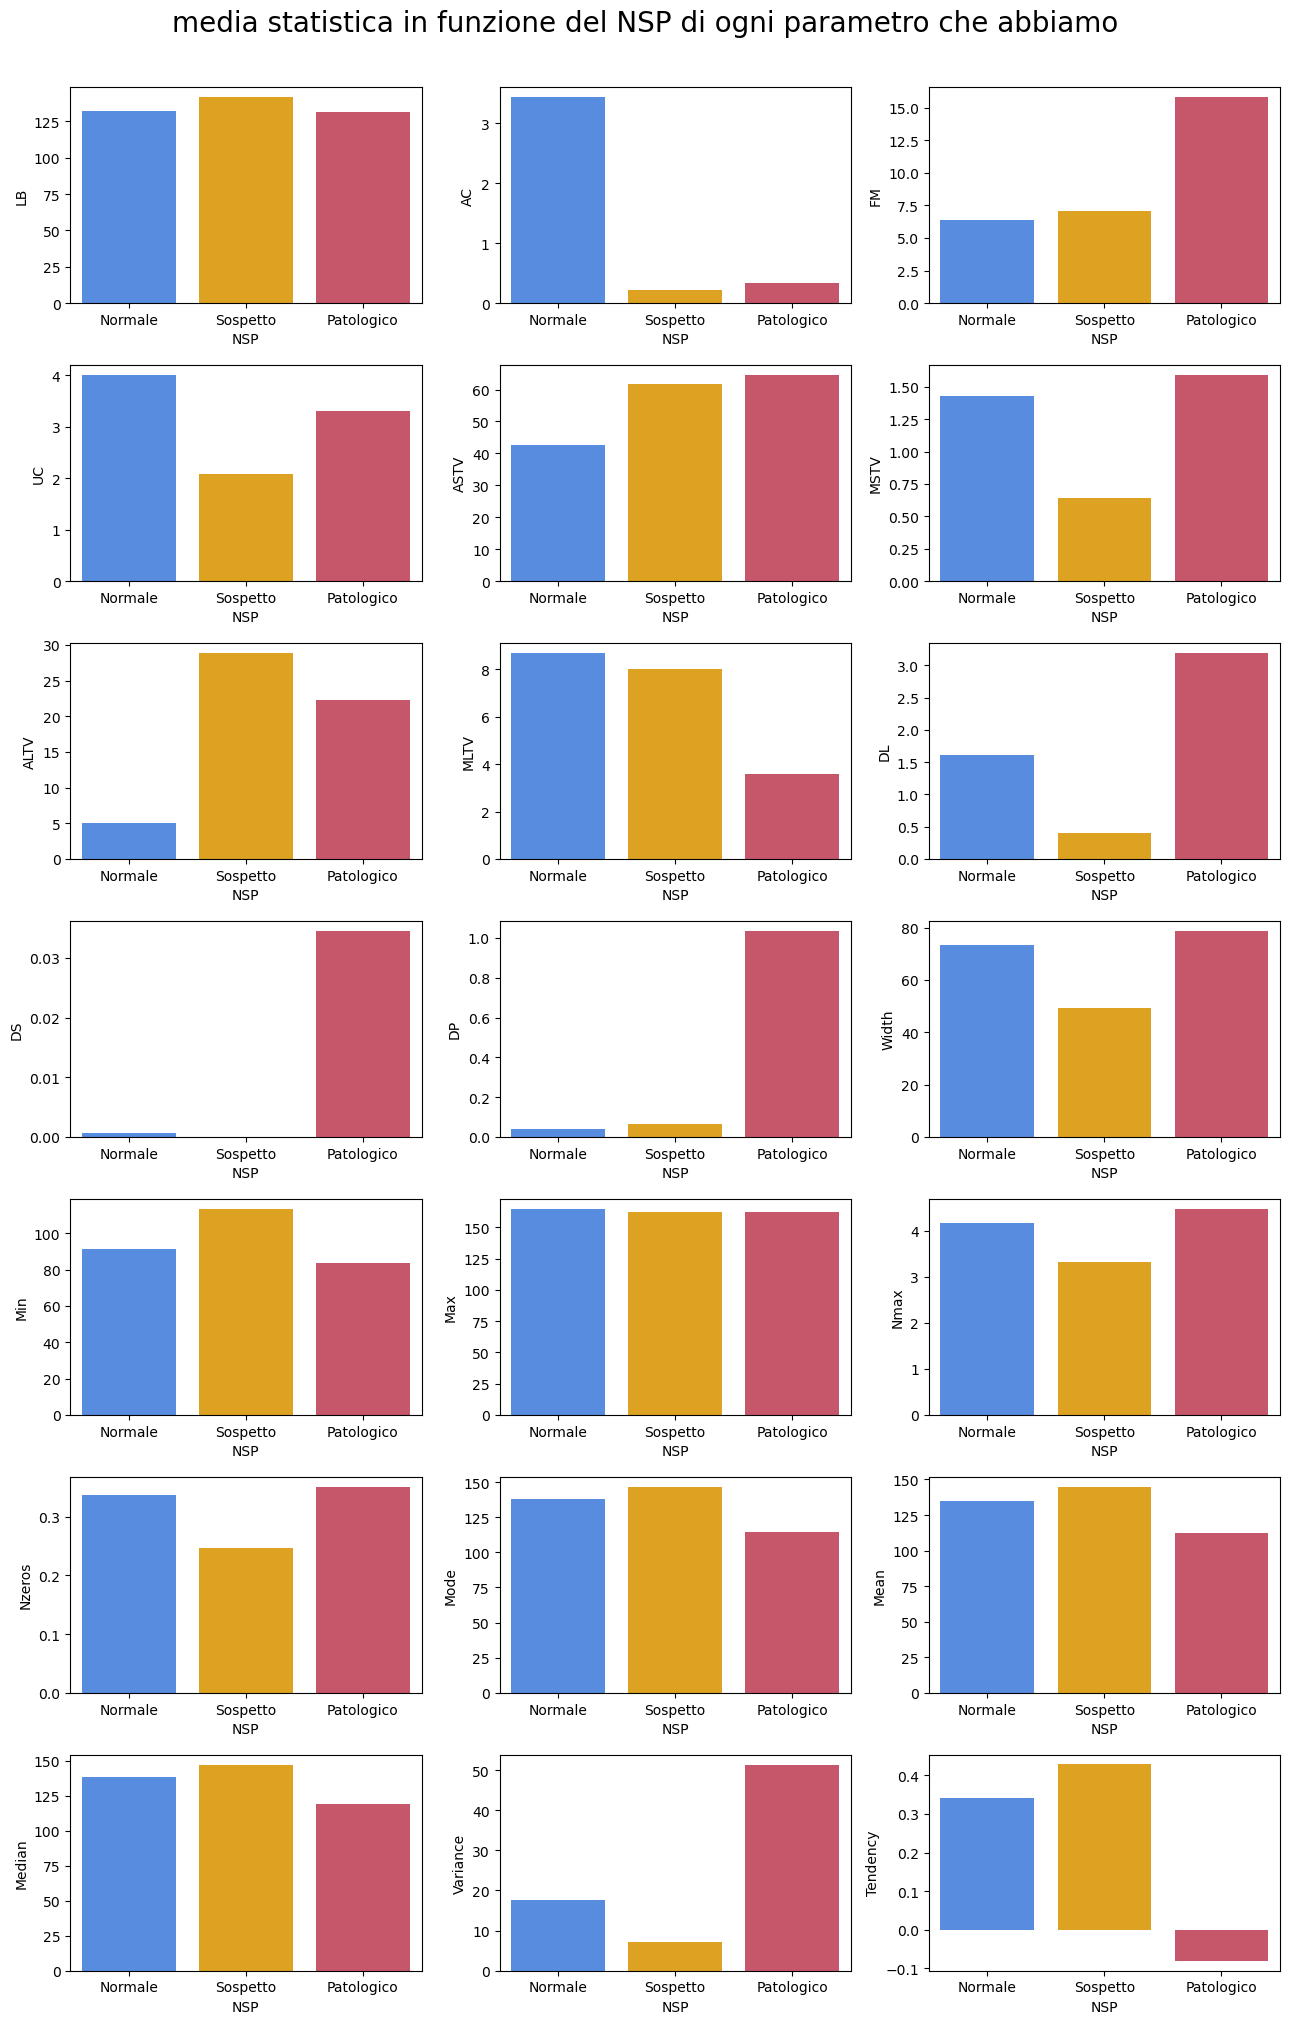

In [27]:
fig, ax = plt.subplots(7,3,figsize=(13,20), tight_layout=True)
for i, col in enumerate(data_mean_NSP):
    g = sns.barplot(x=data_mean_NSP.index, y=col, data=data_mean_NSP, ax=ax[i//3, i%3], palette=colours)
    g.set_xticklabels(labels=["Normale", "Sospetto", "Patologico"])
fig.suptitle('media statistica in funzione del NSP di ogni parametro che abbiamo', fontsize=20, y=1.01)

#### Ora invece calcoliamo la mediana in funzione del NSP per parametro che abbiamo

In [35]:
data_median_NSP = data.groupby('NSP').median()
data_median_NSP.T

NSP,1.0,2.0,3.0
LB,132.0,143.00,132.00
AC,2.0,0.00,0.00
FM,0.0,0.00,1.00
UC,4.0,1.00,3.00
ASTV,41.0,63.00,65.00
MSTV,1.3,0.45,1.70
ALTV,0.0,26.00,0.00
MLTV,7.9,7.10,3.25
DL,0.0,0.00,2.00
DS,0.0,0.00,0.00


Visualizziamo ora questi dati in versione istogramma

Text(0.5, 1.01, 'mediana in funzione del NSP di ogni parametro che abbiamo')

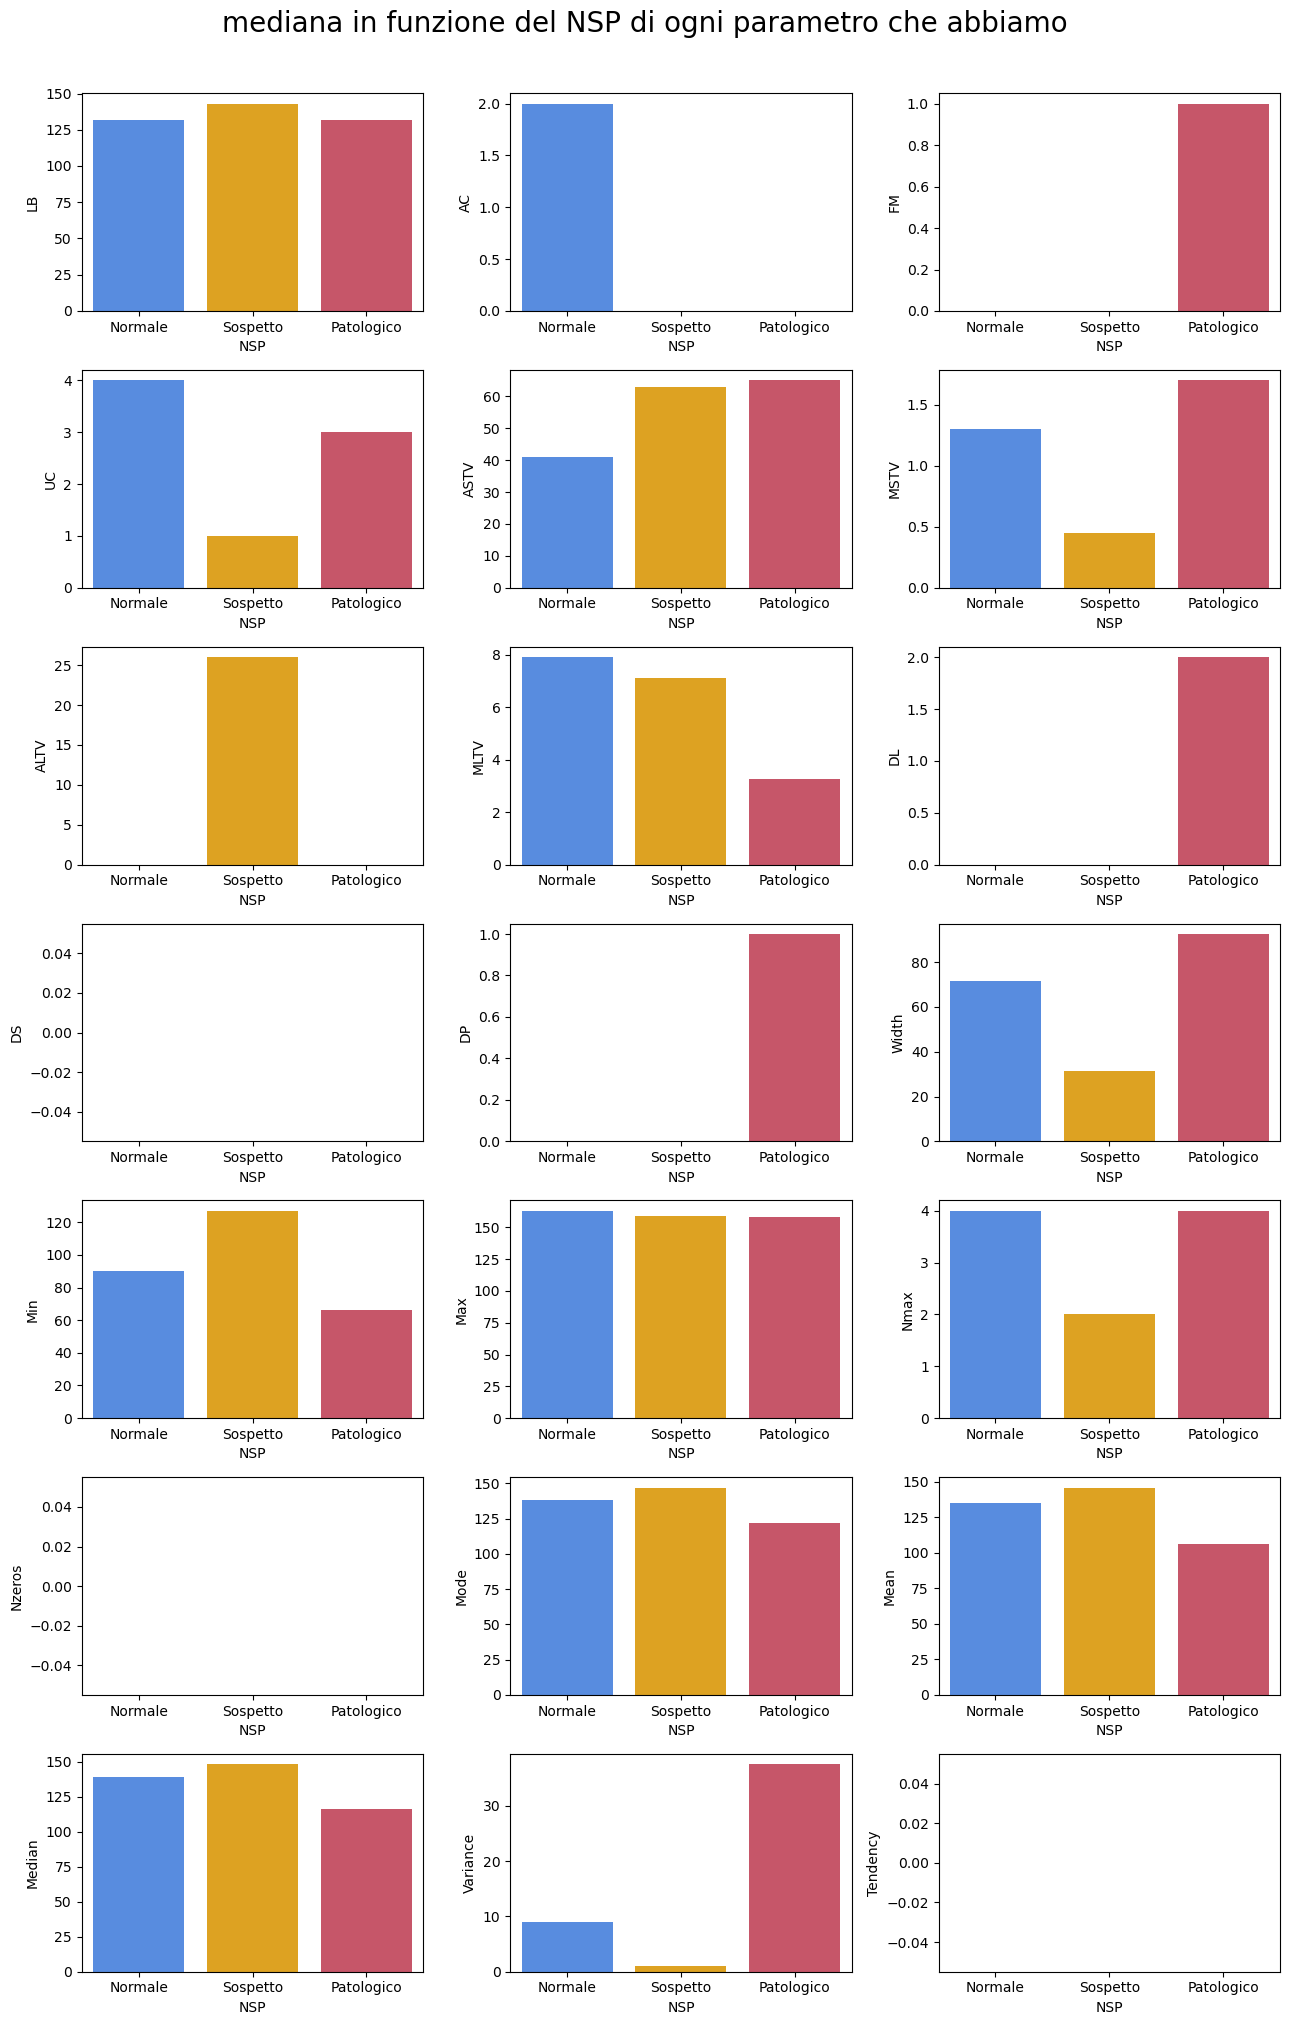

In [29]:
fig, ax = plt.subplots(7,3,figsize=(13,20), tight_layout=True)
for i, col in enumerate(data_median_NSP):
    g = sns.barplot(x=data_median_NSP.index, y=col, data=data_median_NSP, ax=ax[i//3, i%3], palette=colours)
    g.set_xticklabels(labels=["Normale", "Sospetto", "Patologico"])
fig.suptitle('mediana in funzione del NSP di ogni parametro che abbiamo', fontsize=20, y=1.01)

## Analisi in relazione a NSP e visualizzazione dei vari outliers

#### Visulizziamo i singoli parametri relazionati al NSP attraverso i boxplot

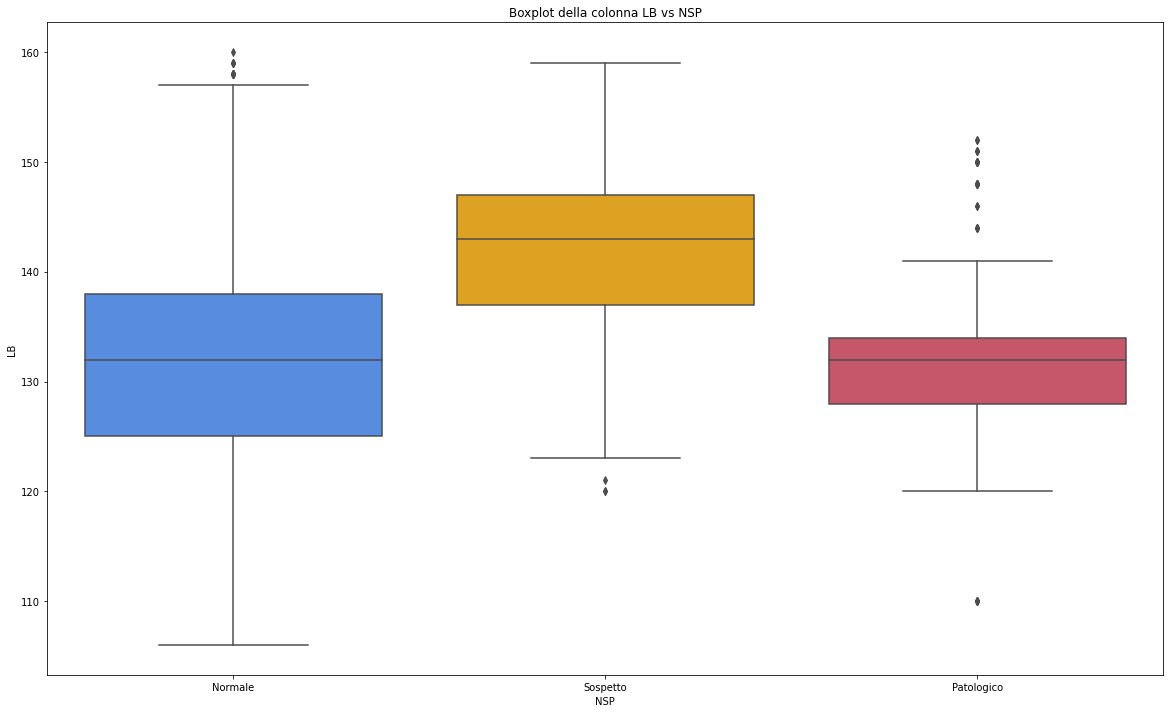

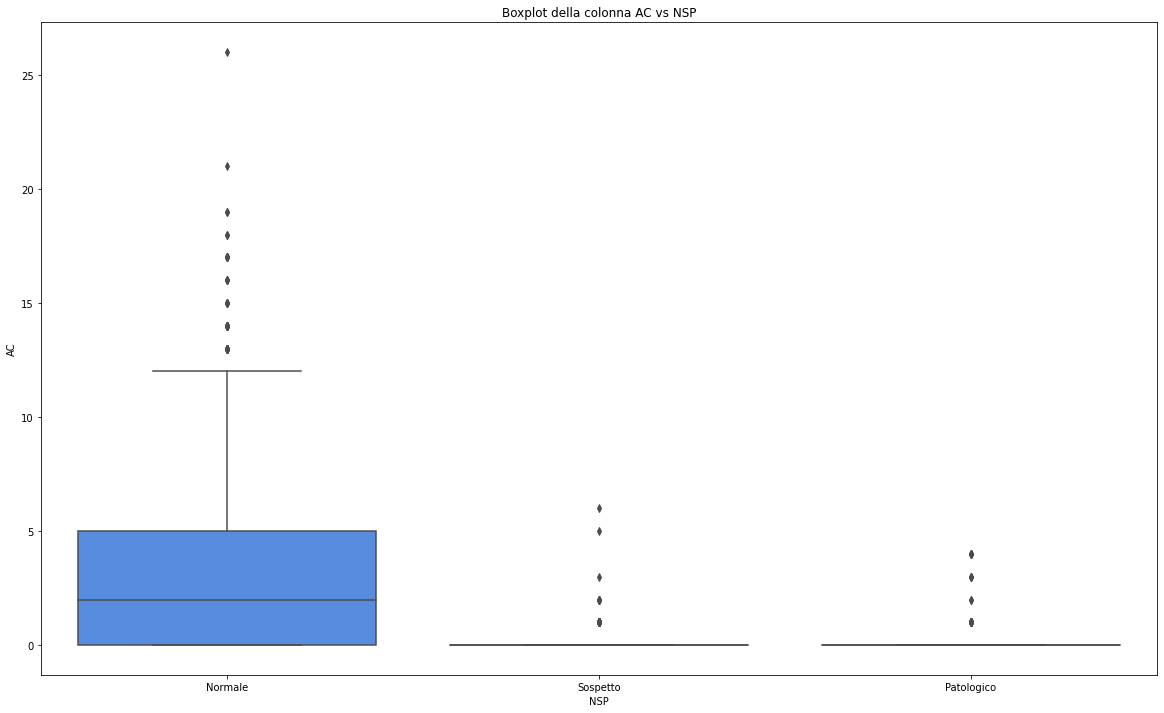

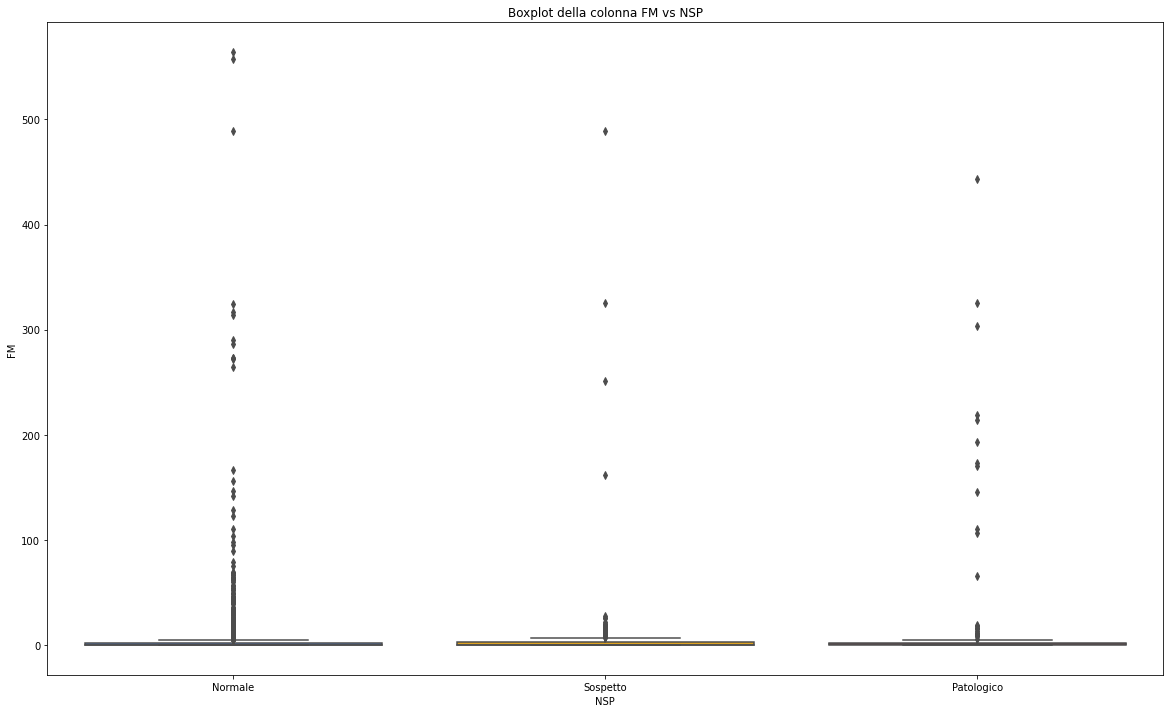

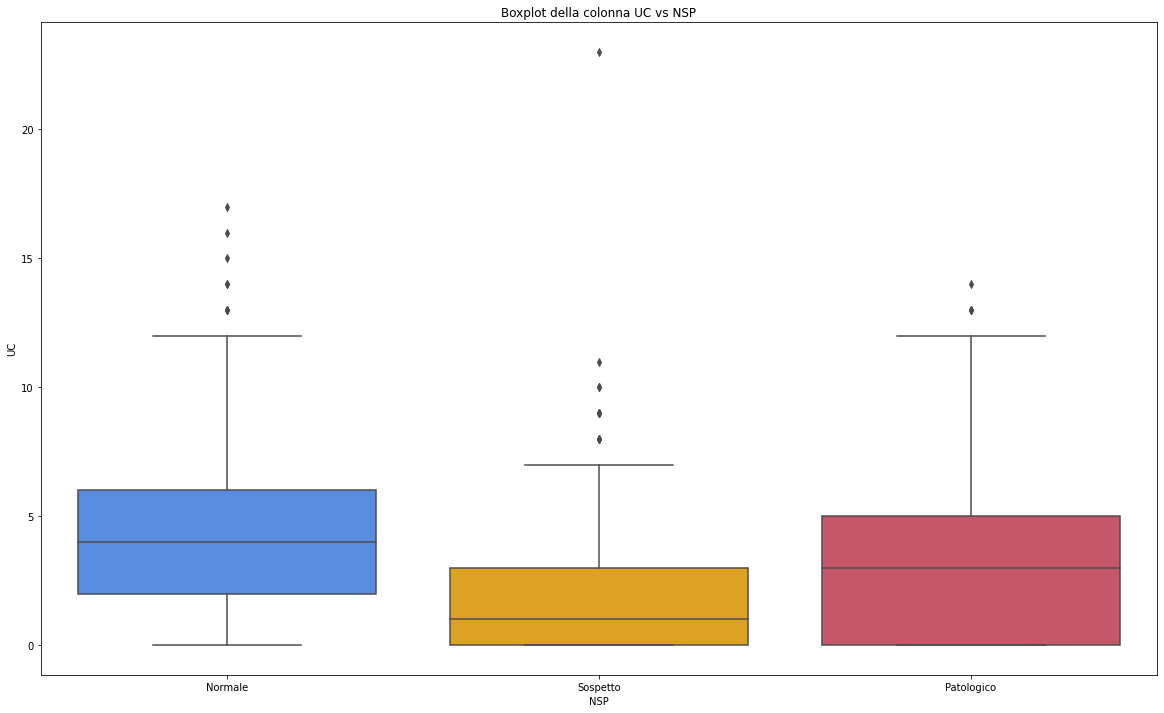

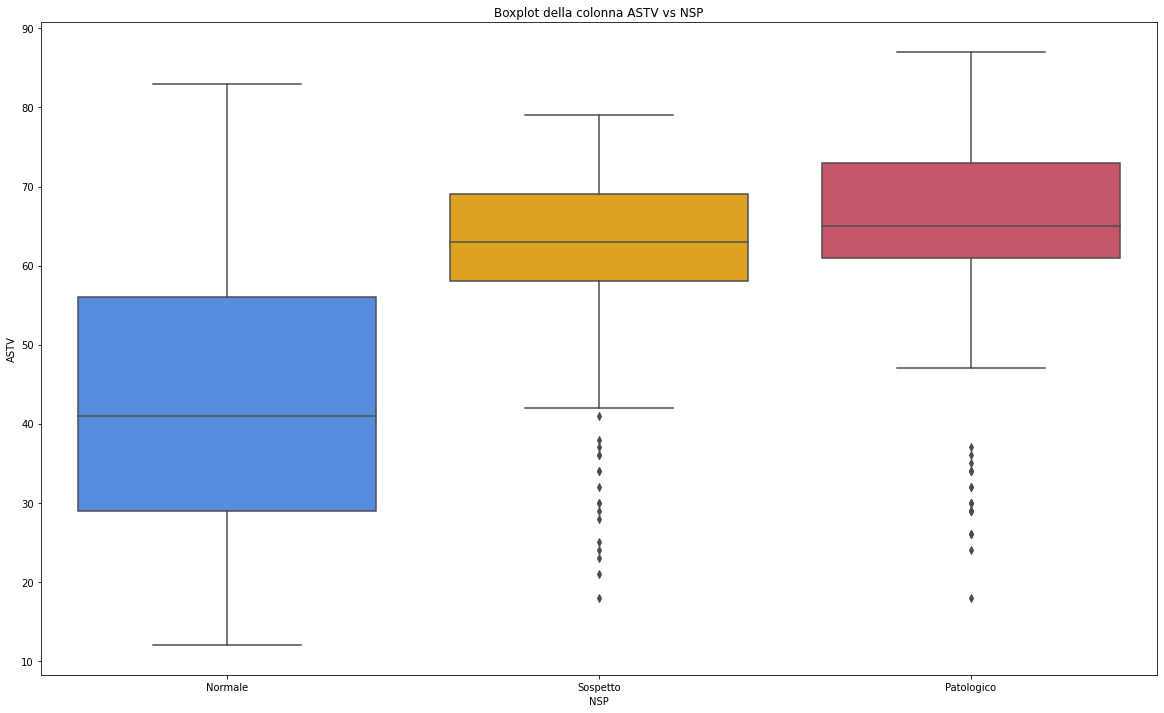

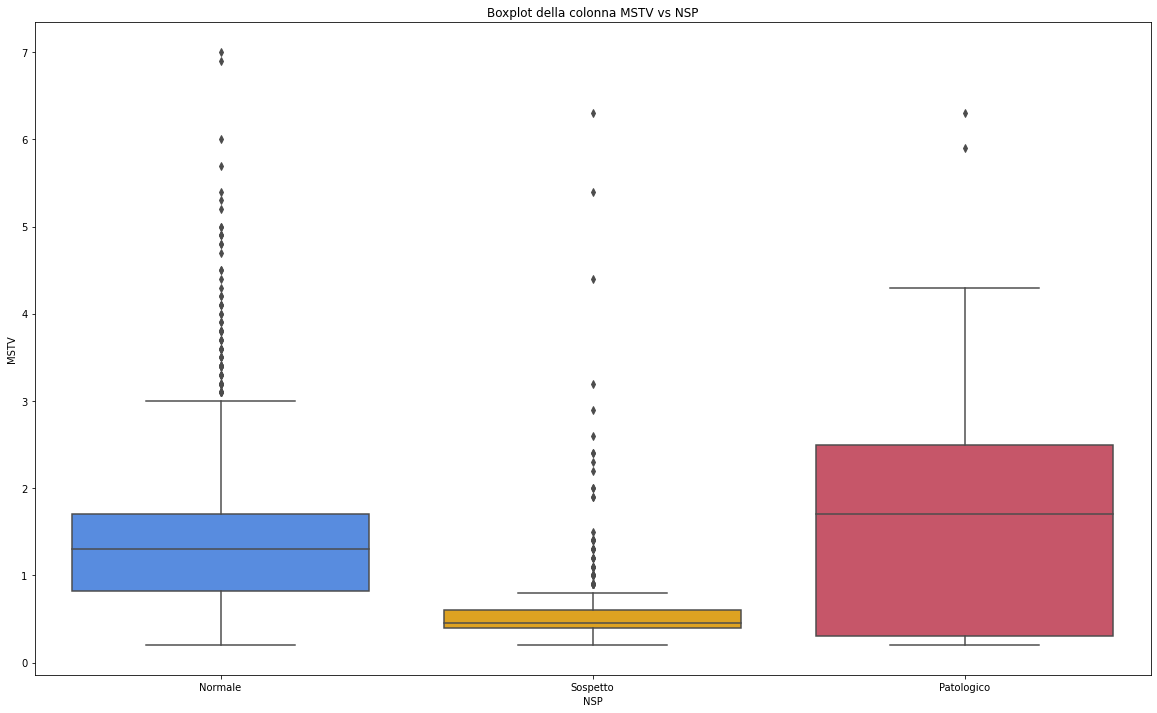

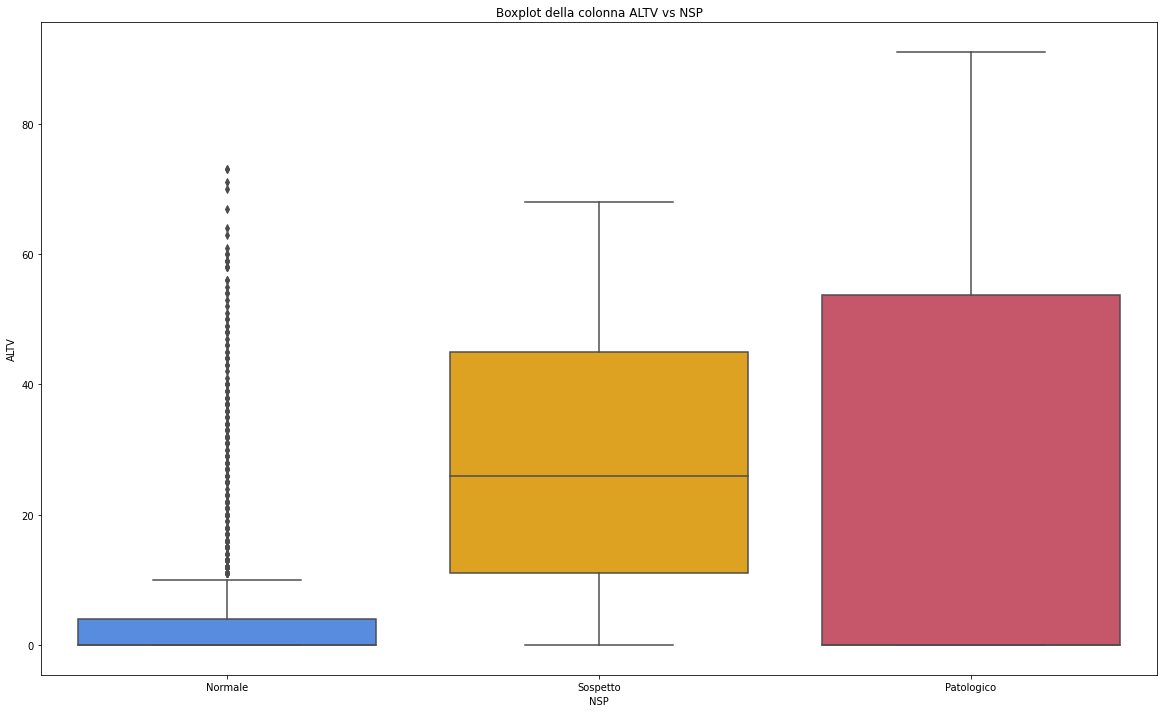

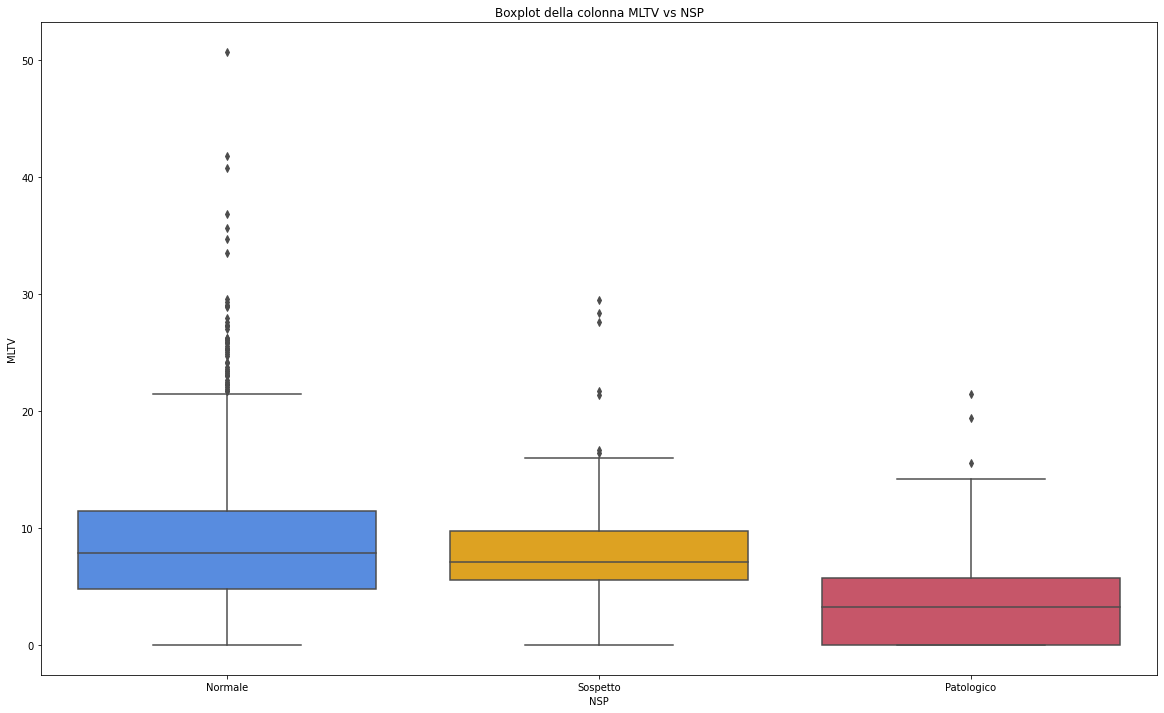

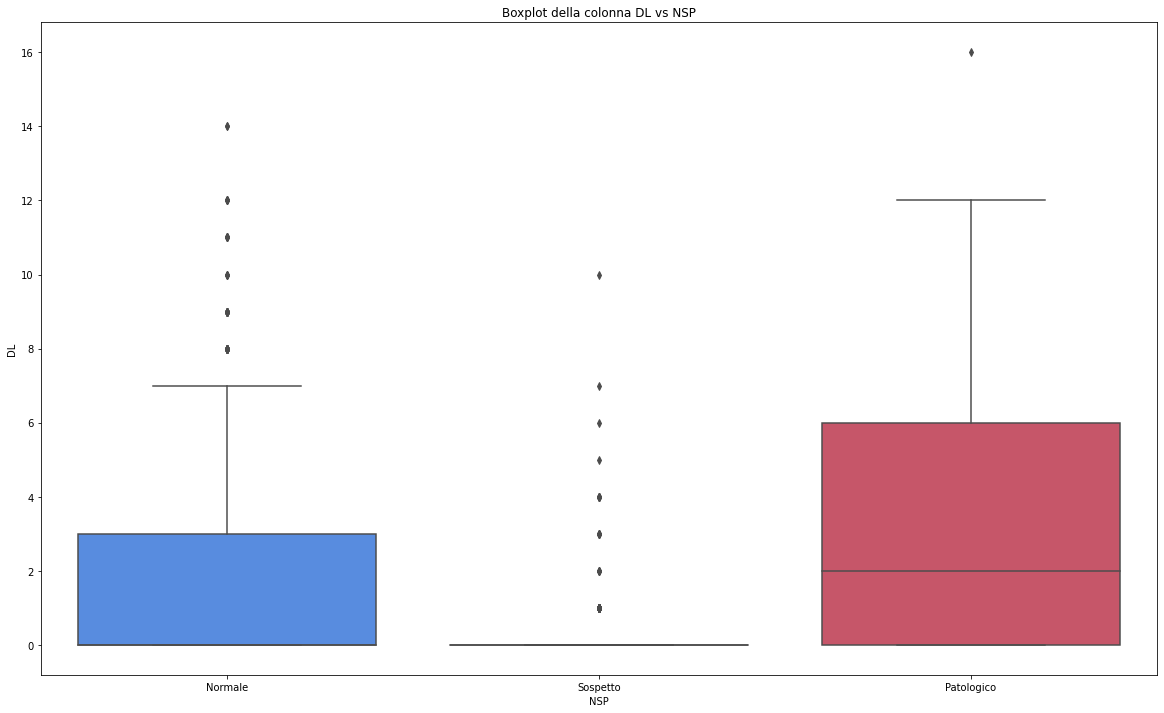

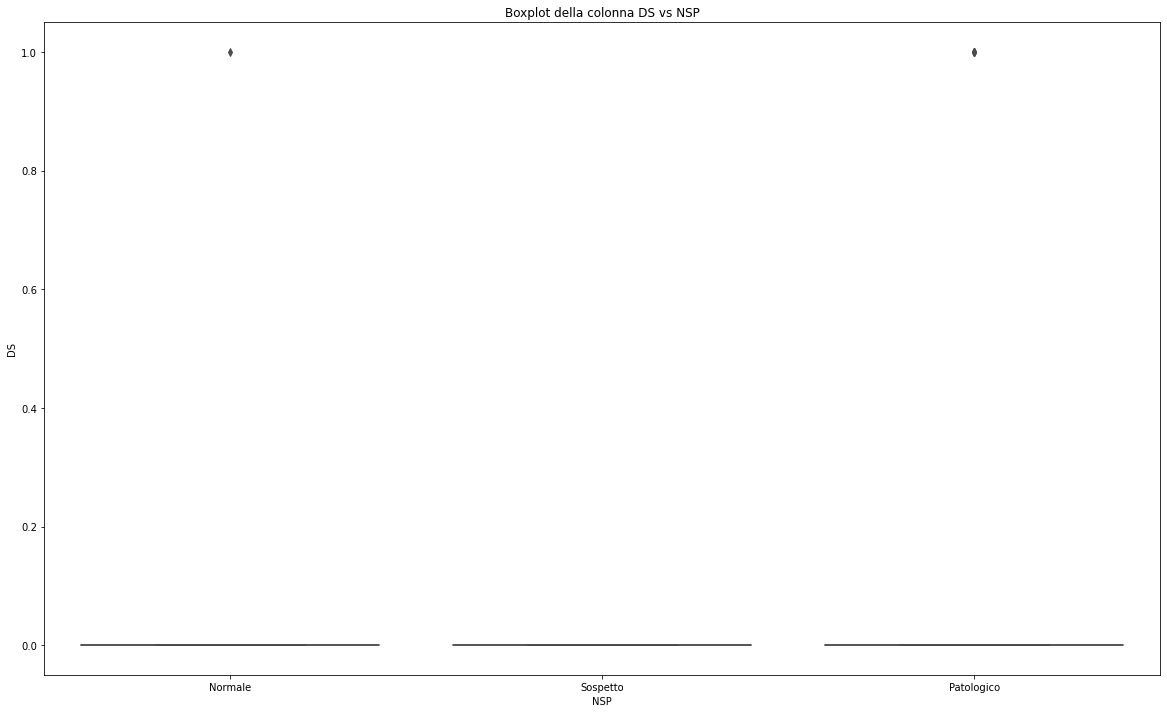

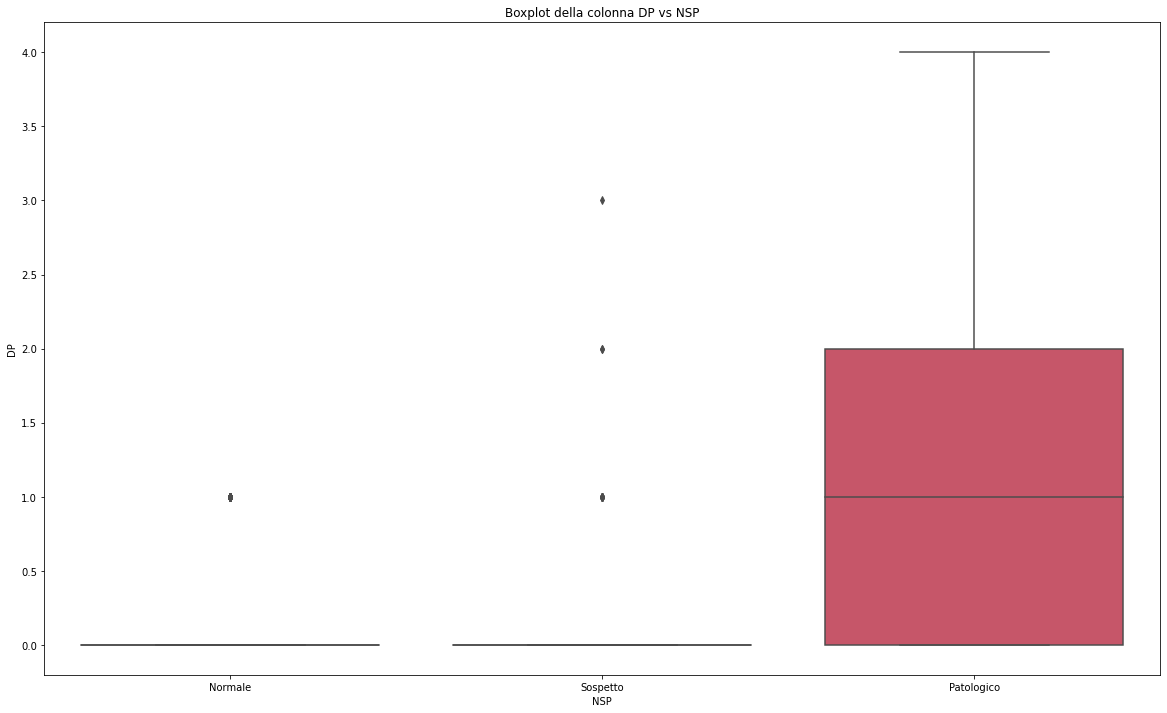

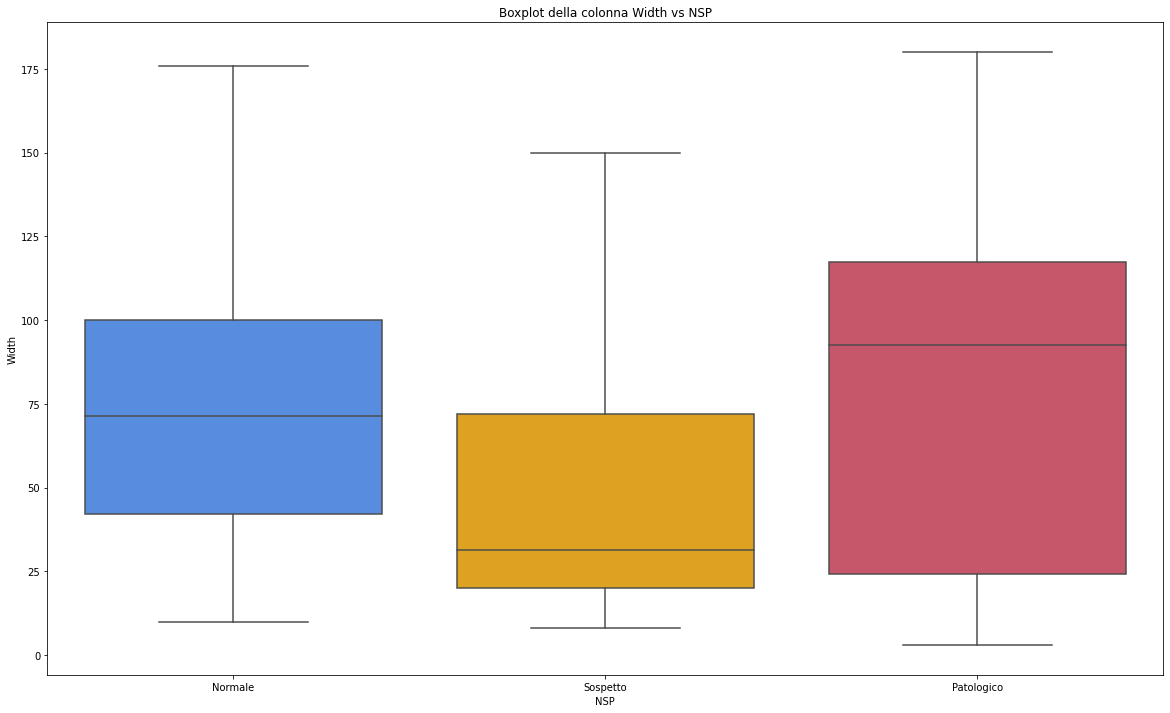

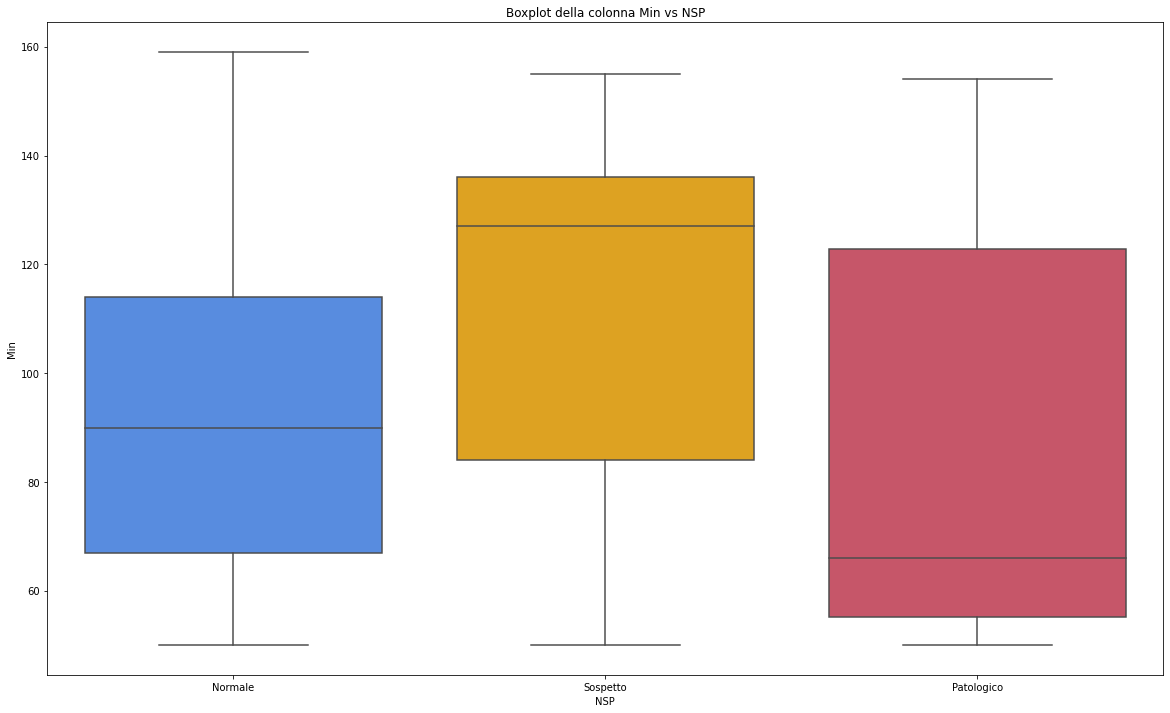

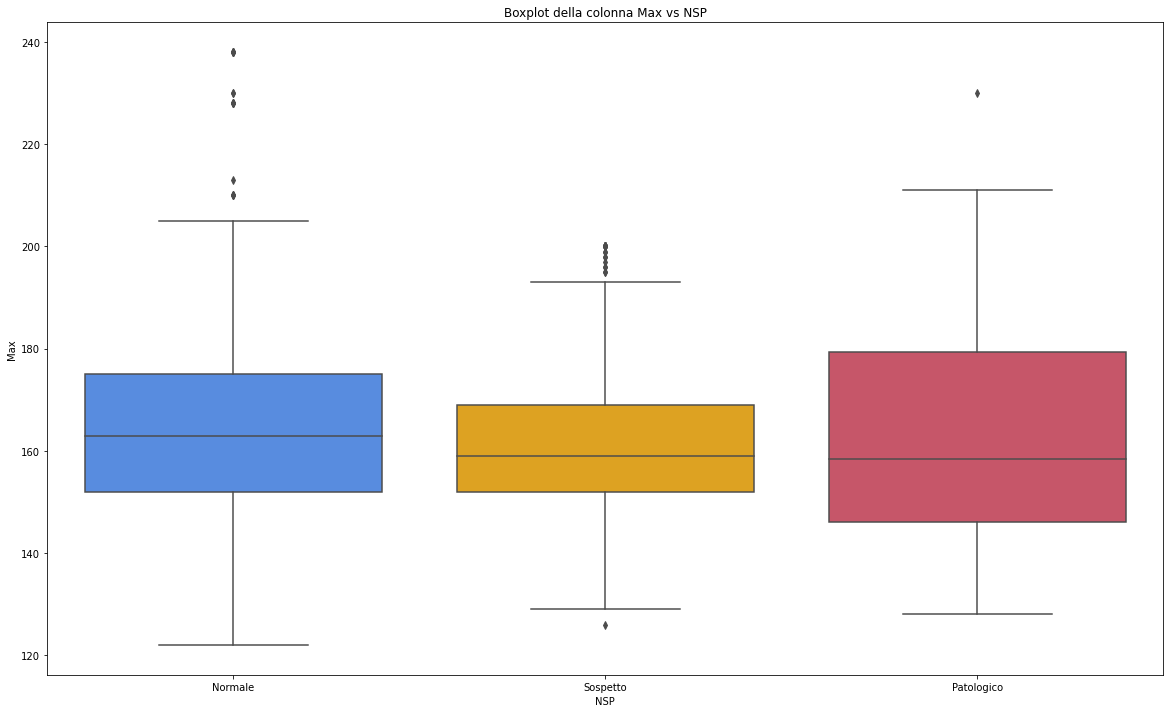

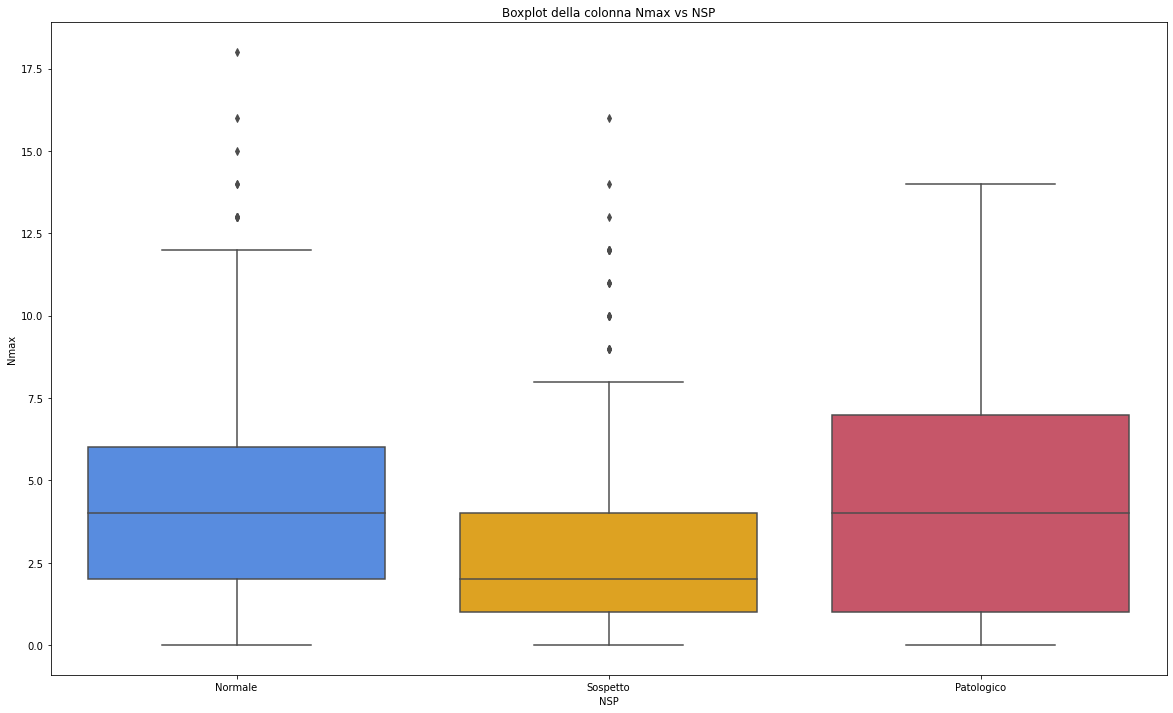

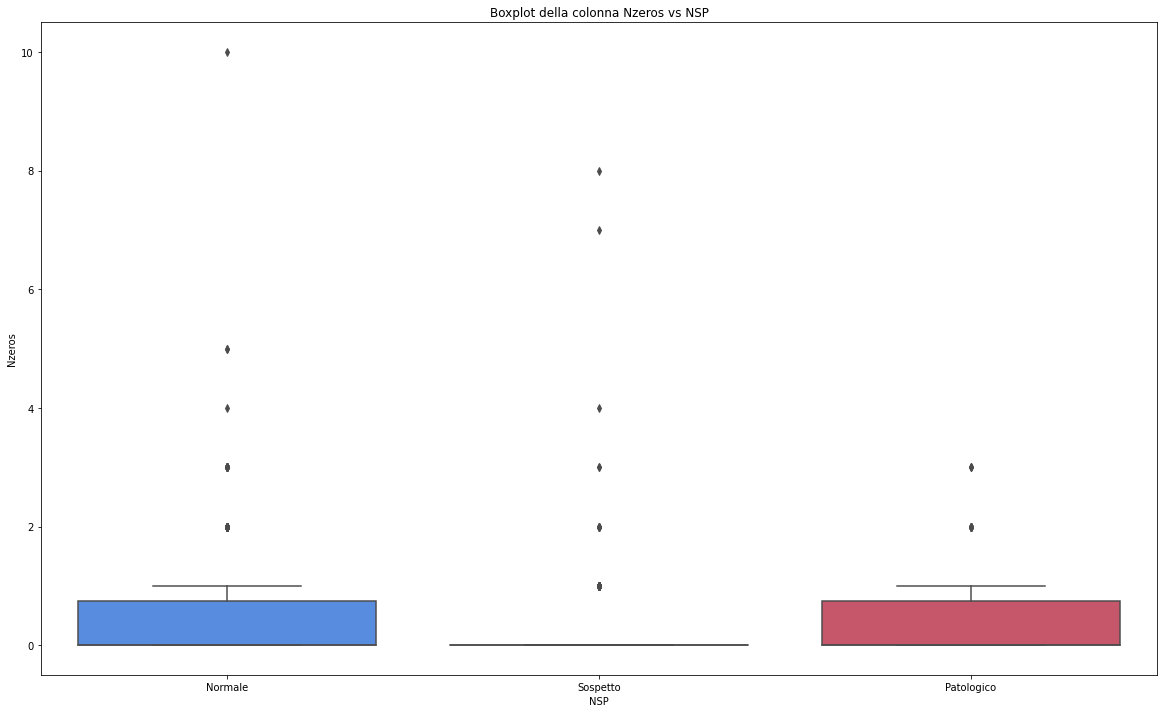

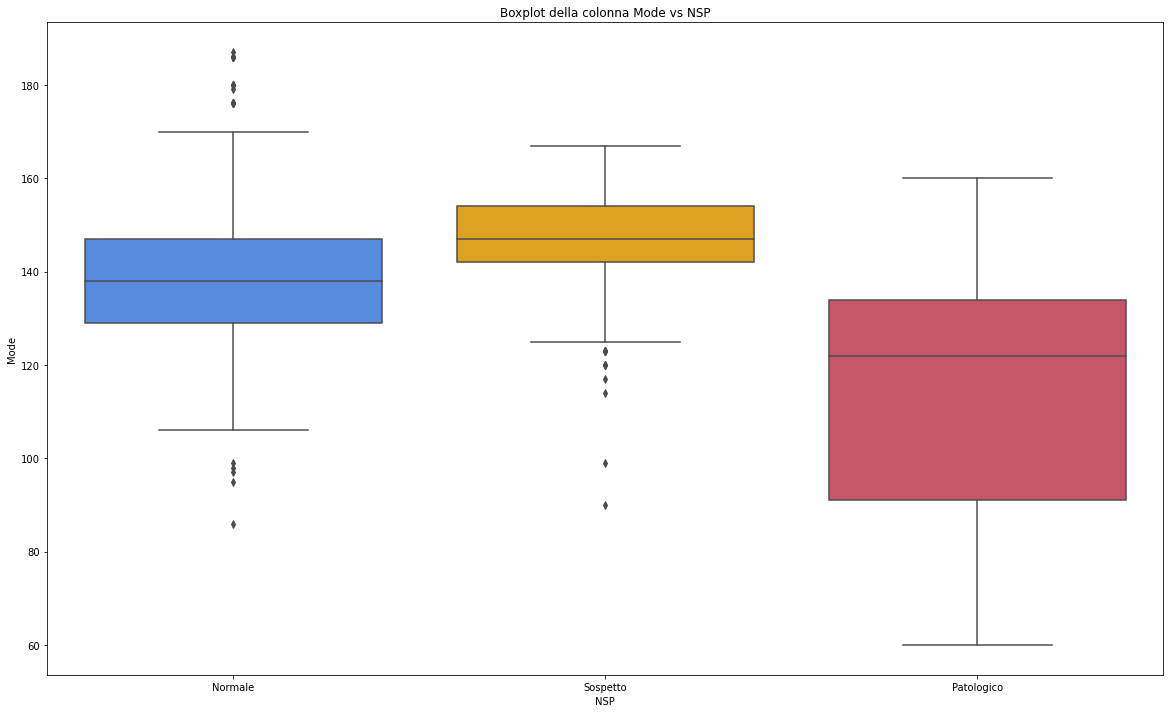

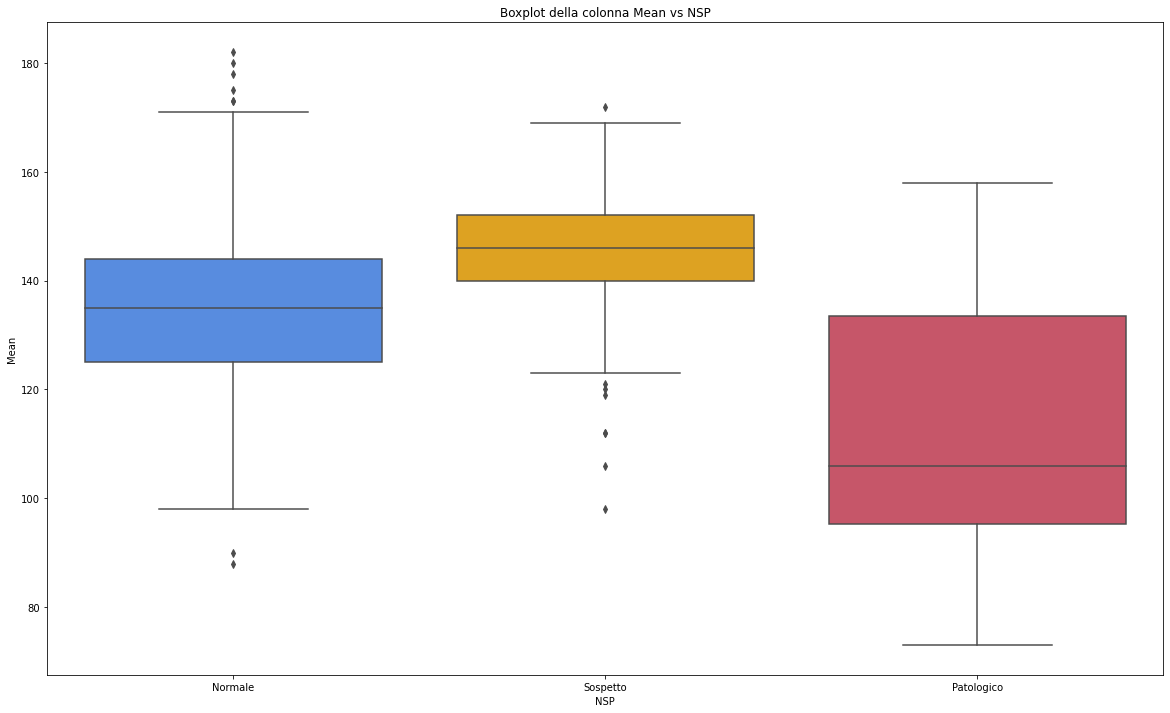

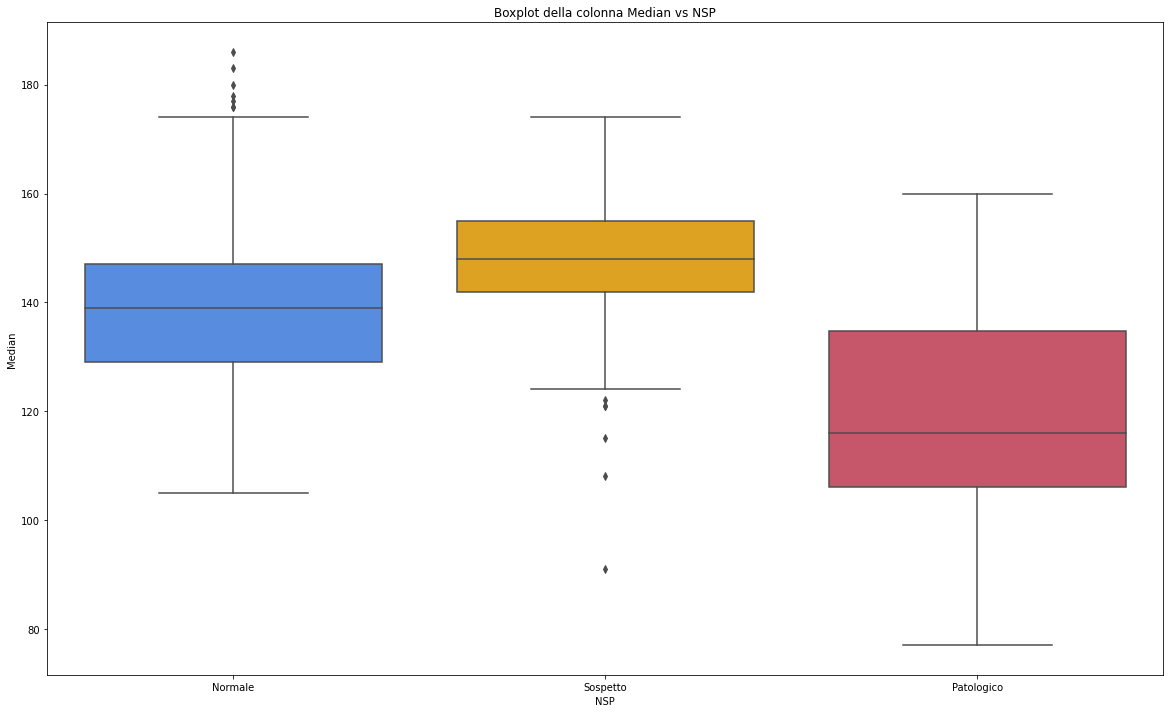

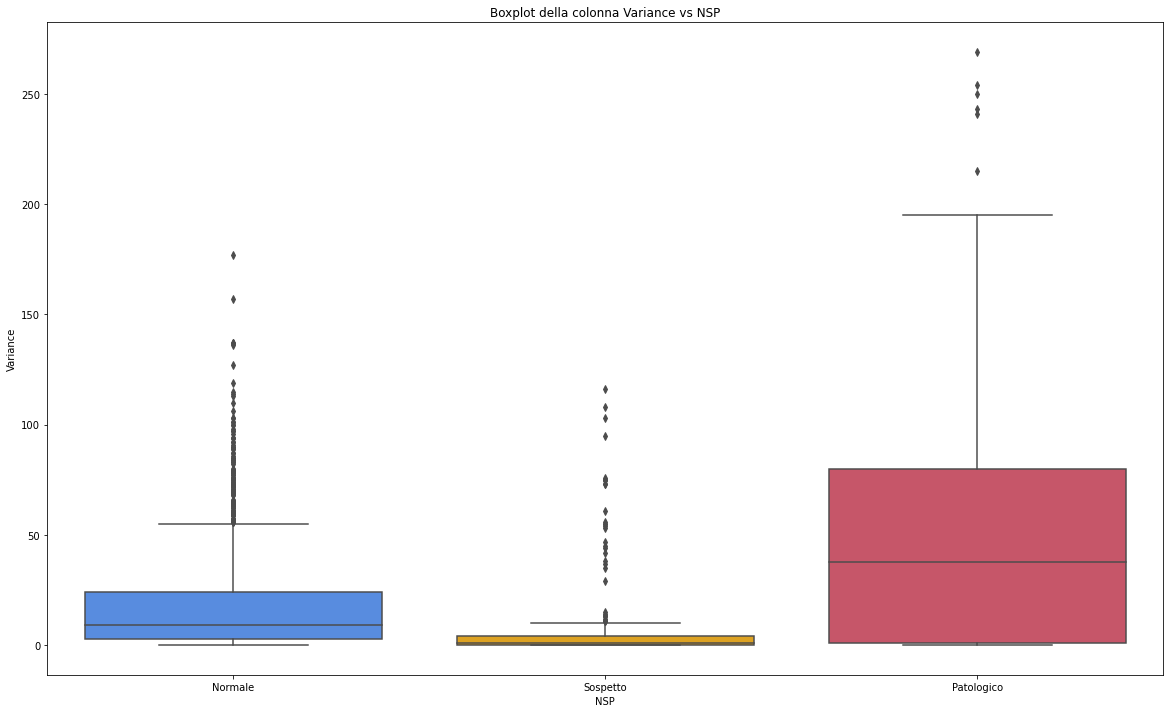

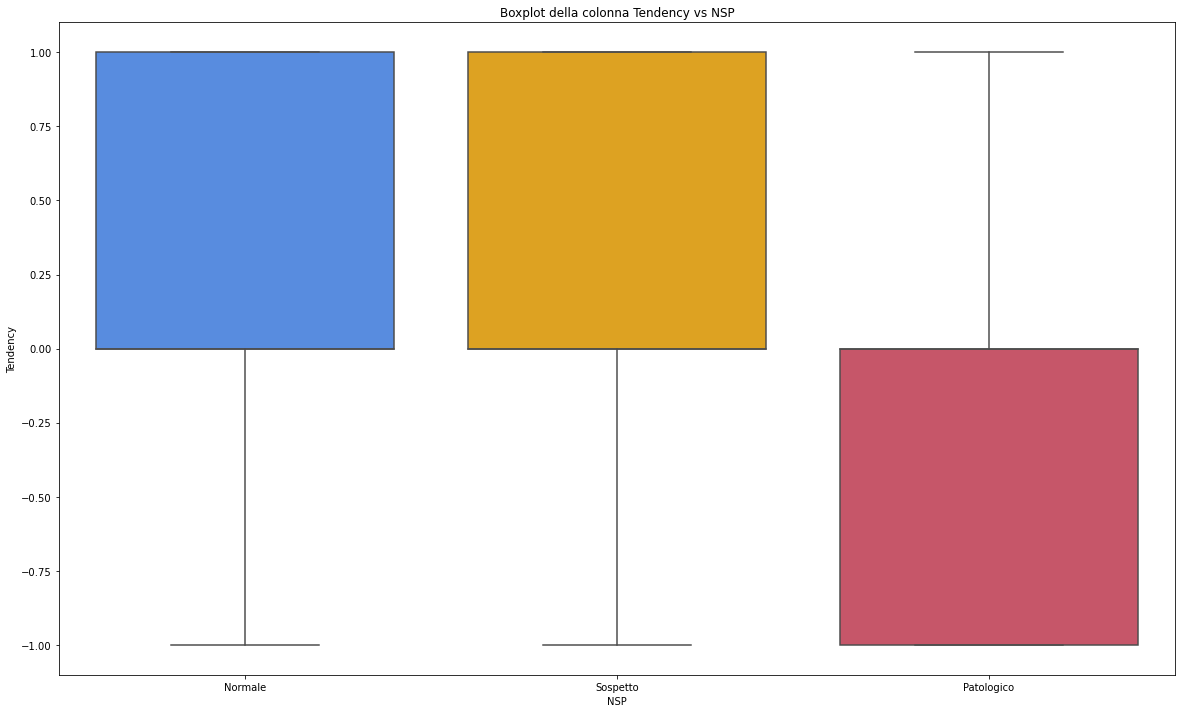

In [37]:
for col in data.columns[:-1]:
    # creo il bxplot
    plt.figure(figsize=(20,12))
    sns.boxplot(data, x='NSP', y=col, palette=colours)
    plt.title(f"Boxplot della colonna {col} vs NSP")
    plt.xticks(x, x_labels)
    plt.show()

Attraverso questi grafici possiamo evincere che per quasi la totalità delle feature sono presenti un gran numero di outliers

## Analisi su alcune relazioni ritenute potenzialmente interessanti in funzione del parametro NSP

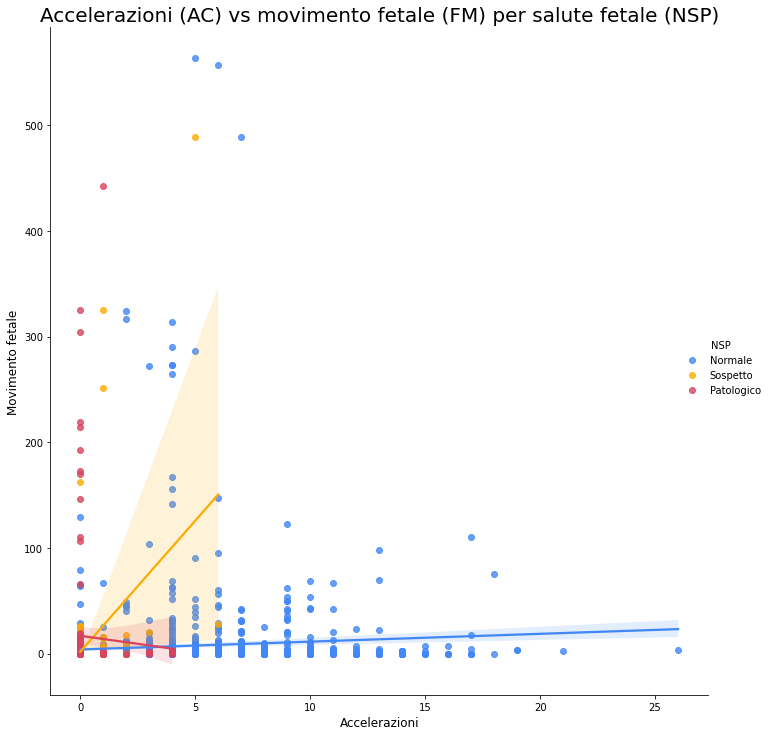

In [68]:
# plt.figure(figsize=(12,5))
gfa = sns.lmplot(data =data,x="AC",y="FM",palette=colours, hue="NSP", height=10, aspect=1)
plt.title('Accelerazioni (AC) vs movimento fetale (FM) per salute fetale (NSP)', fontsize=20)
plt.xlabel('Accelerazioni', fontsize=12)
plt.ylabel('Movimento fetale', fontsize=12);
new_labels = ["Normale", "Sospetto", "Patologico"]
for t, l in zip(gfa._legend.texts, new_labels):
    t.set_text(l)

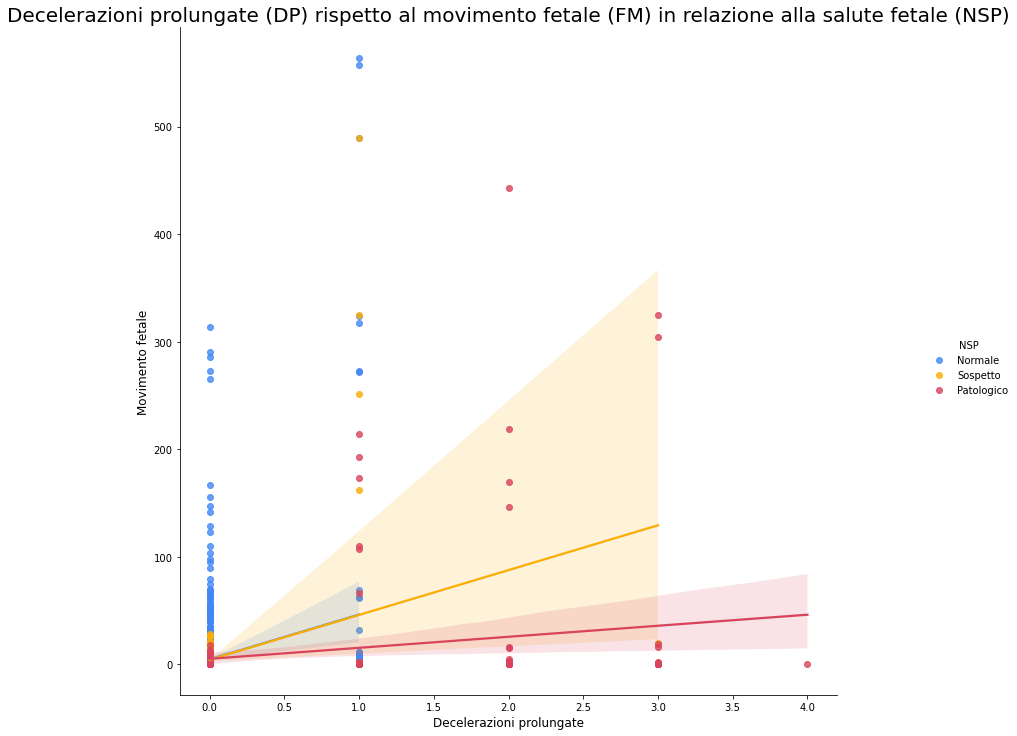

In [67]:
gfd = sns.lmplot(data =data,x="DP",y="FM",palette=colours, hue="NSP", height=10, aspect=1)
plt.title('Decelerazioni prolungate (DP) rispetto al movimento fetale (FM) in relazione alla salute fetale (NSP)', fontsize=20)
plt.xlabel('Decelerazioni prolungate', fontsize=12)
plt.ylabel('Movimento fetale', fontsize=12);
new_labels = ["Normale", "Sospetto", "Patologico"]
for t, l in zip(gfd._legend.texts, new_labels):
    t.set_text(l)

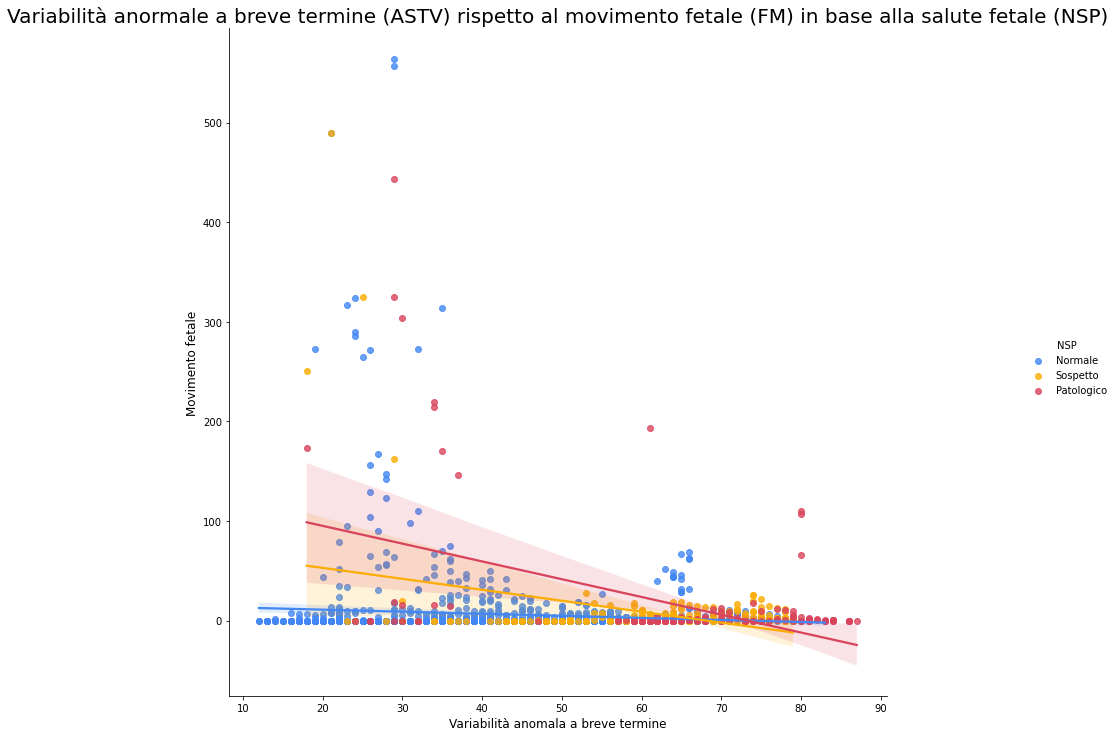

In [66]:
gfv = sns.lmplot(data =data,x="ASTV",y="FM",palette=colours, hue="NSP", height=10, aspect=1)
plt.title('Variabilità anormale a breve termine (ASTV) rispetto al movimento fetale (FM) in base alla salute fetale (NSP)', fontsize=20)
plt.xlabel('Variabilità anomala a breve termine', fontsize=12)
plt.ylabel('Movimento fetale', fontsize=12);
new_labels = ["Normale", "Sospetto", "Patologico"]
for t, l in zip(gfv._legend.texts, new_labels):
    t.set_text(l)

<Figure size 864x360 with 0 Axes>

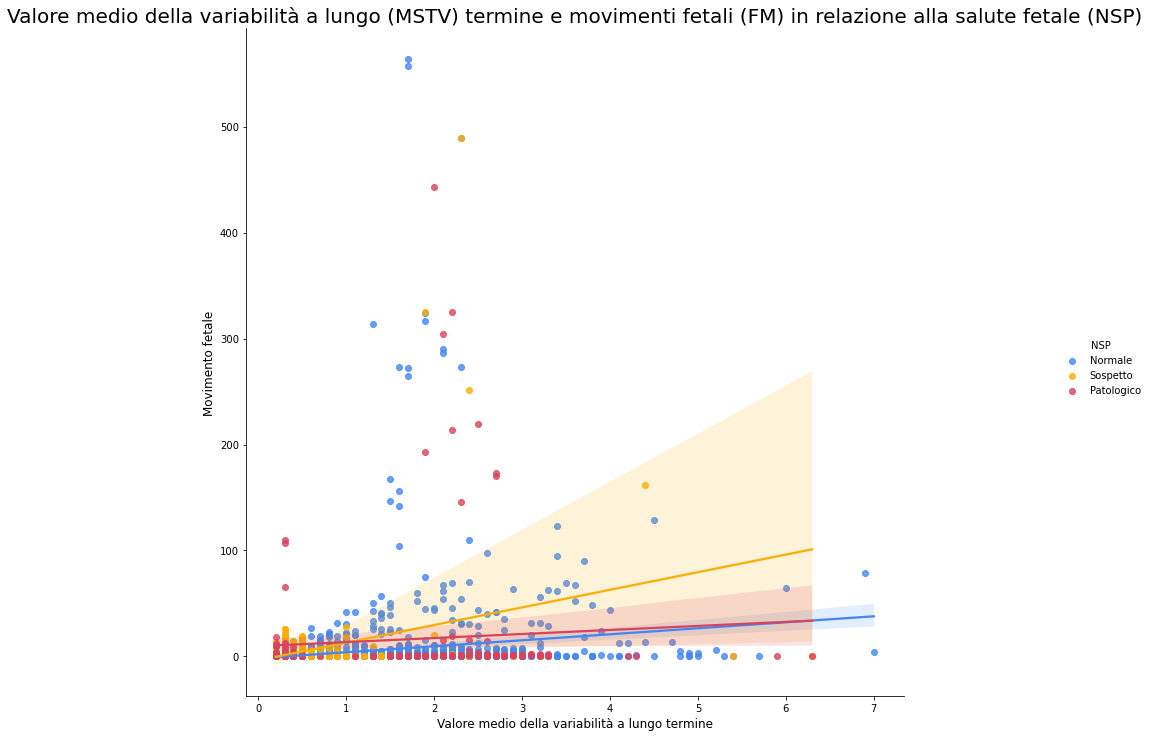

In [64]:
gfm = sns.lmplot(data =data,x="MSTV",y="FM",palette=colours, hue="NSP", height=10, aspect=1)
plt.title('Valore medio della variabilità a lungo (MSTV) termine e movimenti fetali (FM) in relazione alla salute fetale (NSP)', fontsize=20)
plt.xlabel('Valore medio della variabilità a lungo termine', fontsize=12)
plt.ylabel('Movimento fetale', fontsize=12);
new_labels = ["Normale", "Sospetto", "Patologico"]
for t, l in zip(gfm._legend.texts, new_labels):
    t.set_text(l)

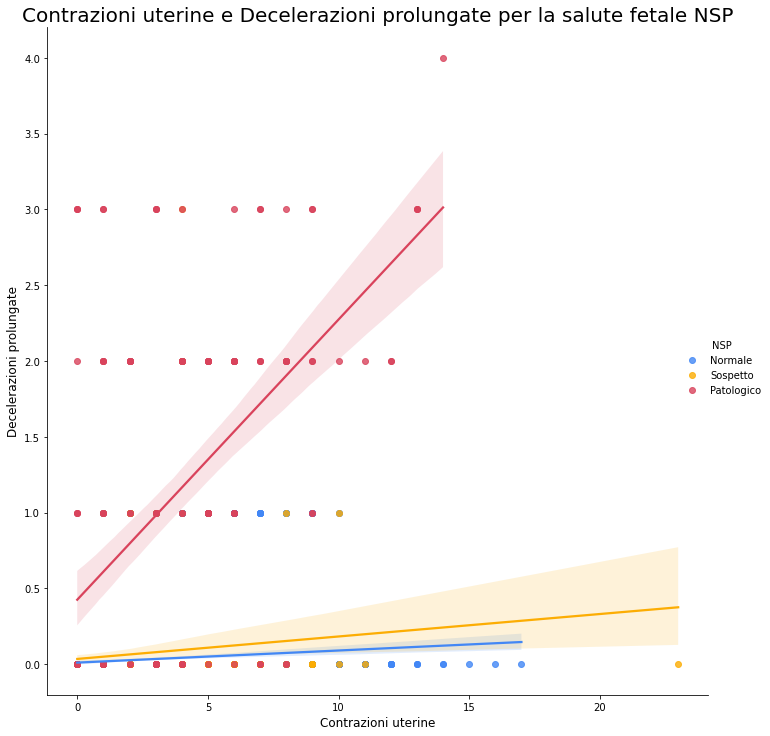

In [70]:
gfc = sns.lmplot(data =data,x="UC",y="DP",palette=colours, hue="NSP", height=10, aspect=1)
plt.title('Contrazioni uterine e Decelerazioni prolungate per la salute fetale NSP', fontsize=20)
plt.xlabel('Contrazioni uterine', fontsize=12)
plt.ylabel('Decelerazioni prolungate', fontsize=12);
new_labels = ["Normale", "Sospetto", "Patologico"]
for t, l in zip(gfc._legend.texts, new_labels):
    t.set_text(l)

Dai grafici soprastanti possiamo vedere come sono distribuite le tre classi di salute fetale in funzione delle coppie di parametri scelte. Da questi grafici possiamo anche individuare i valori che risultano essere anomali che analizzeremo attraverso strumenti più appropriati

## Recap sulla presenza degli outliers su tutto il DataSet

Rappresentiamo attraverso un boxplot tutte le caratteristiche tranne la classificazione NSP

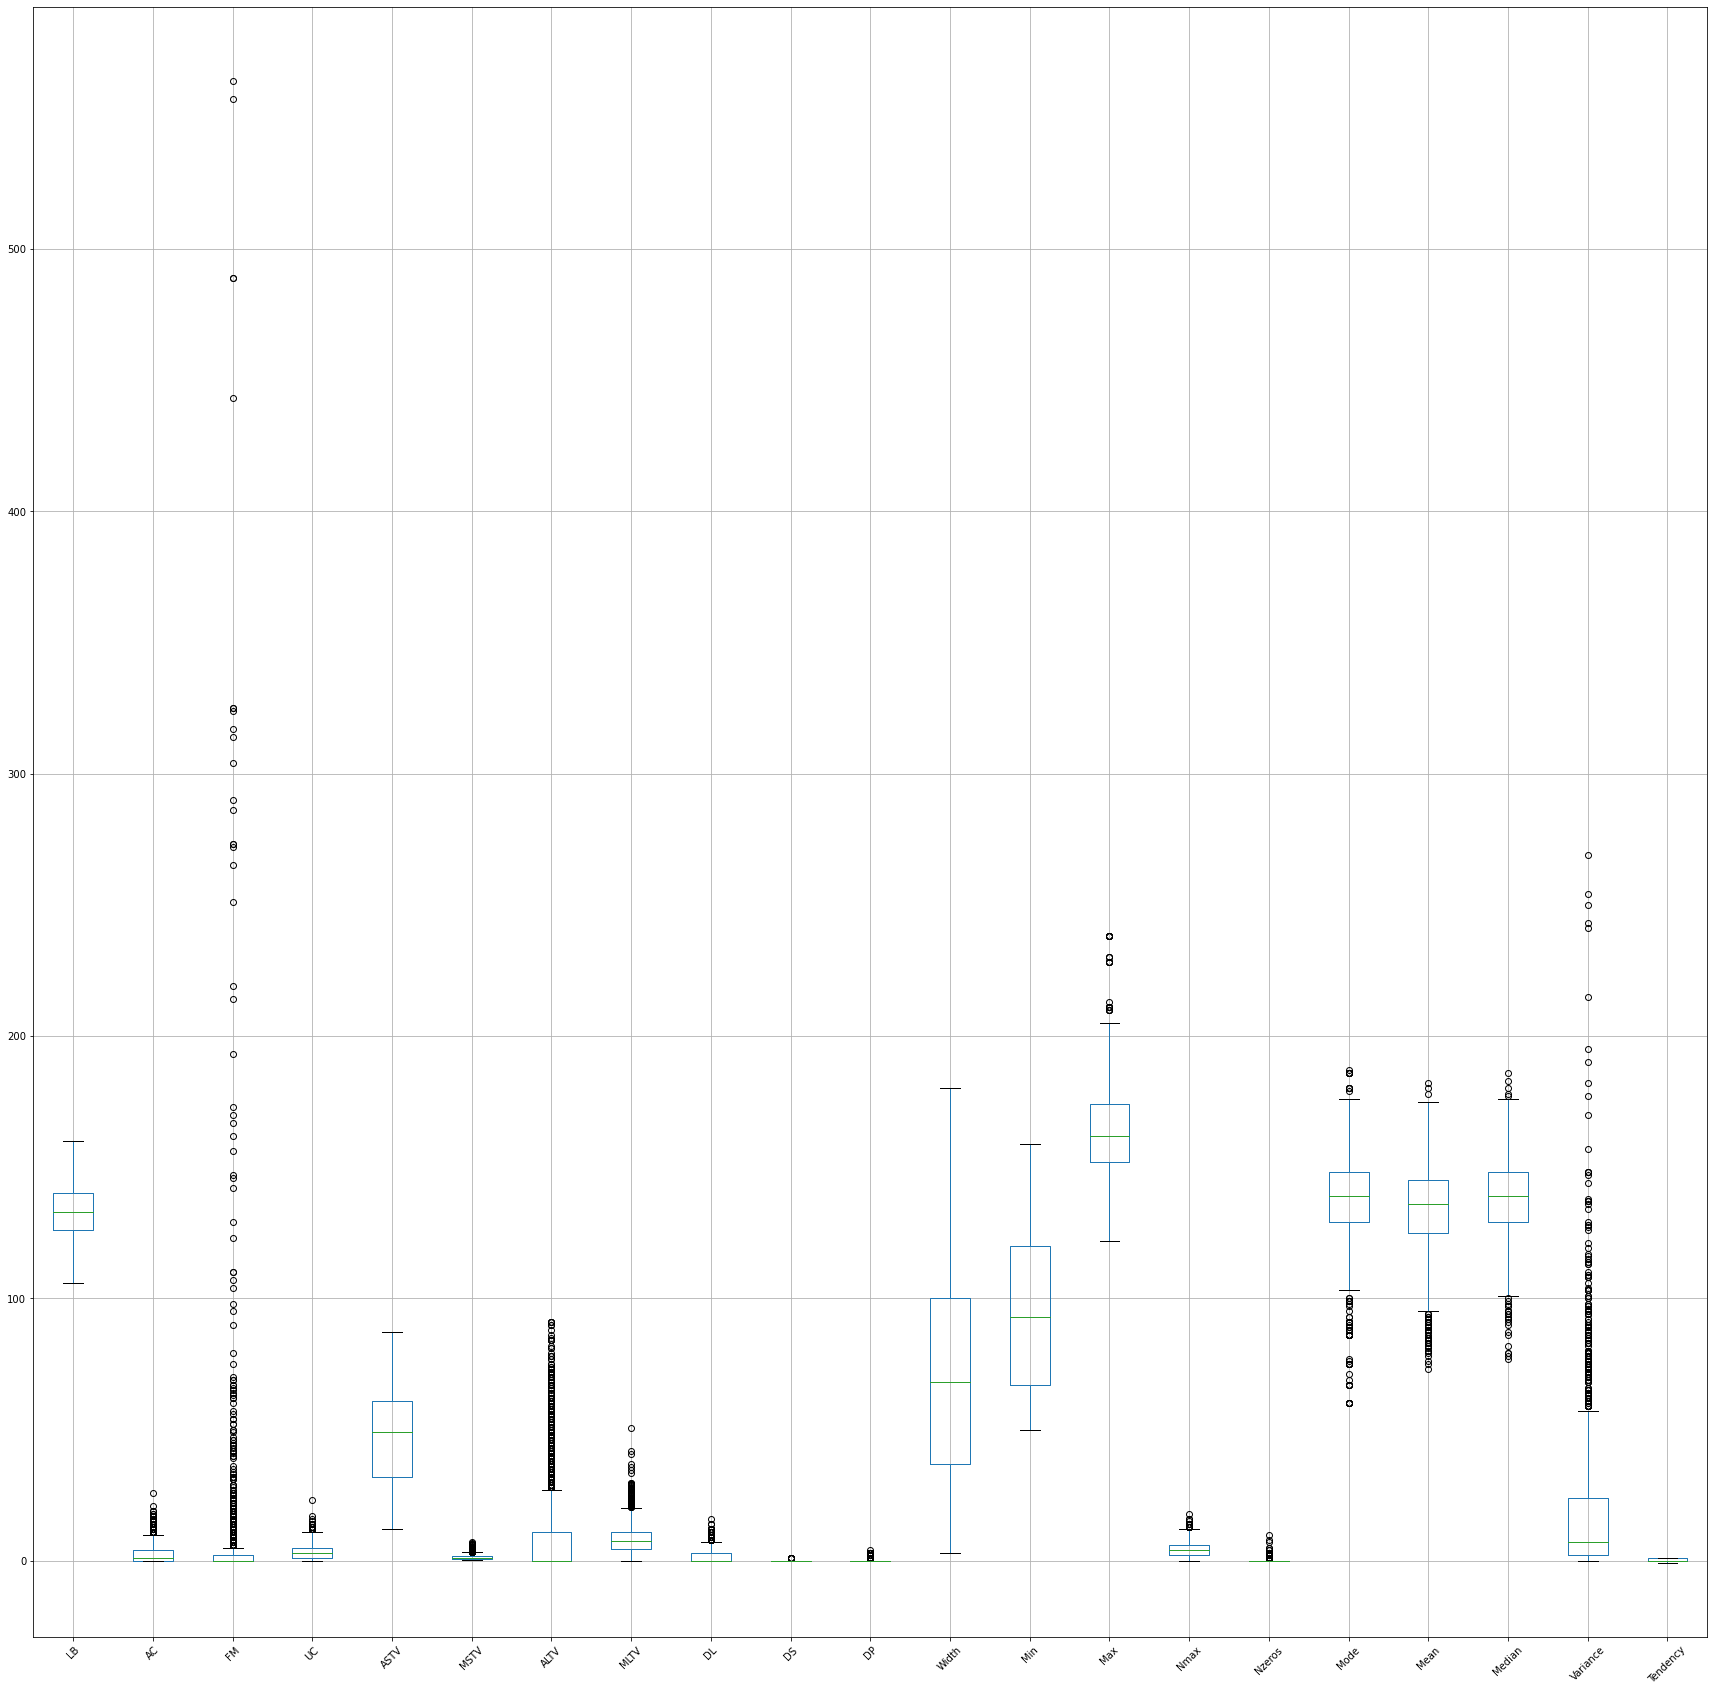

In [85]:
data_senza_nsp = data.drop(columns=['NSP'])
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
data_senza_nsp.boxplot(ax=ax, rot=45)
plt.show()

In definitiva abbiamo individuato degli outlier nel DataSet.

Non sappiamo se sia una buona idea rimuoverli perché potrebbe portare a un **overfitting**.

Tuttavia, eliminandoli potremmo ottenere statistiche migliori.

Abbiamo trovato delle line guida che ci dicono cosi:
>Una regola di base per gli outlier in questione è la seguente:
>
>Se si tratta di un errore di misurazione o di inserimento dei dati bisogna correggerlo ove possibile.
>
>Se non è possibile correggerlo, eliminarlo dall'osservazione.

Nel nostro caso, si tratta del risultato di un rapporto di cardiotocografia medica (CTG), quindi è improbabile che si tratti di un errore di inserimento dati.

In questo caso, essendo stato sviluppato da eseperti del settore, tutto ciò riguarda il feto e la classificazione sono da cosiderare validi, o quanto meno attendibile.

## Creazione del modello

In [37]:
#assegnamo i valori di features (X) e target (y) 
X=data.drop(["NSP"],axis=1)
y=data["NSP"]

# Dobbaimo Standardizzare il data set base
#Imposto uno scaler standard per le features
nomeColonne = list(X.columns)
standard_scaler = preprocessing.StandardScaler()
X_data= standard_scaler.fit_transform(X)
X_data = pd.DataFrame(X_data, columns=nomeColonne)   
X_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LB,2112.0,-1.345725e-17,1.000237,-2.776686,-0.742251,-0.030199,0.681854,2.716289
AC,2112.0,0.000000e+00,1.000237,-0.766465,-0.766465,-0.486109,0.354958,6.522784
FM,2112.0,2.691450e-17,1.000237,-0.195190,-0.195190,-0.195190,-0.141477,14.951622
UC,2112.0,-1.076580e-16,1.000237,-1.293421,-0.941805,-0.238573,0.464659,6.793748
ASTV,2112.0,8.747212e-17,1.000237,-2.037952,-0.872699,0.117767,0.816919,2.331748
MSTV,2112.0,1.345725e-16,1.000237,-1.284536,-0.718939,-0.153343,0.412253,6.407575
ALTV,2112.0,2.691450e-17,1.000237,-0.534329,-0.534329,-0.534329,0.067890,4.447657
MLTV,2112.0,2.153160e-16,1.000237,-1.450570,-0.633765,-0.136580,0.467146,7.552039
DL,2112.0,-5.382900e-17,1.000237,-0.631281,-0.631281,-0.631281,0.566981,5.759450
DS,2112.0,-3.700743e-17,1.000237,-0.057666,-0.057666,-0.057666,-0.057666,17.341115


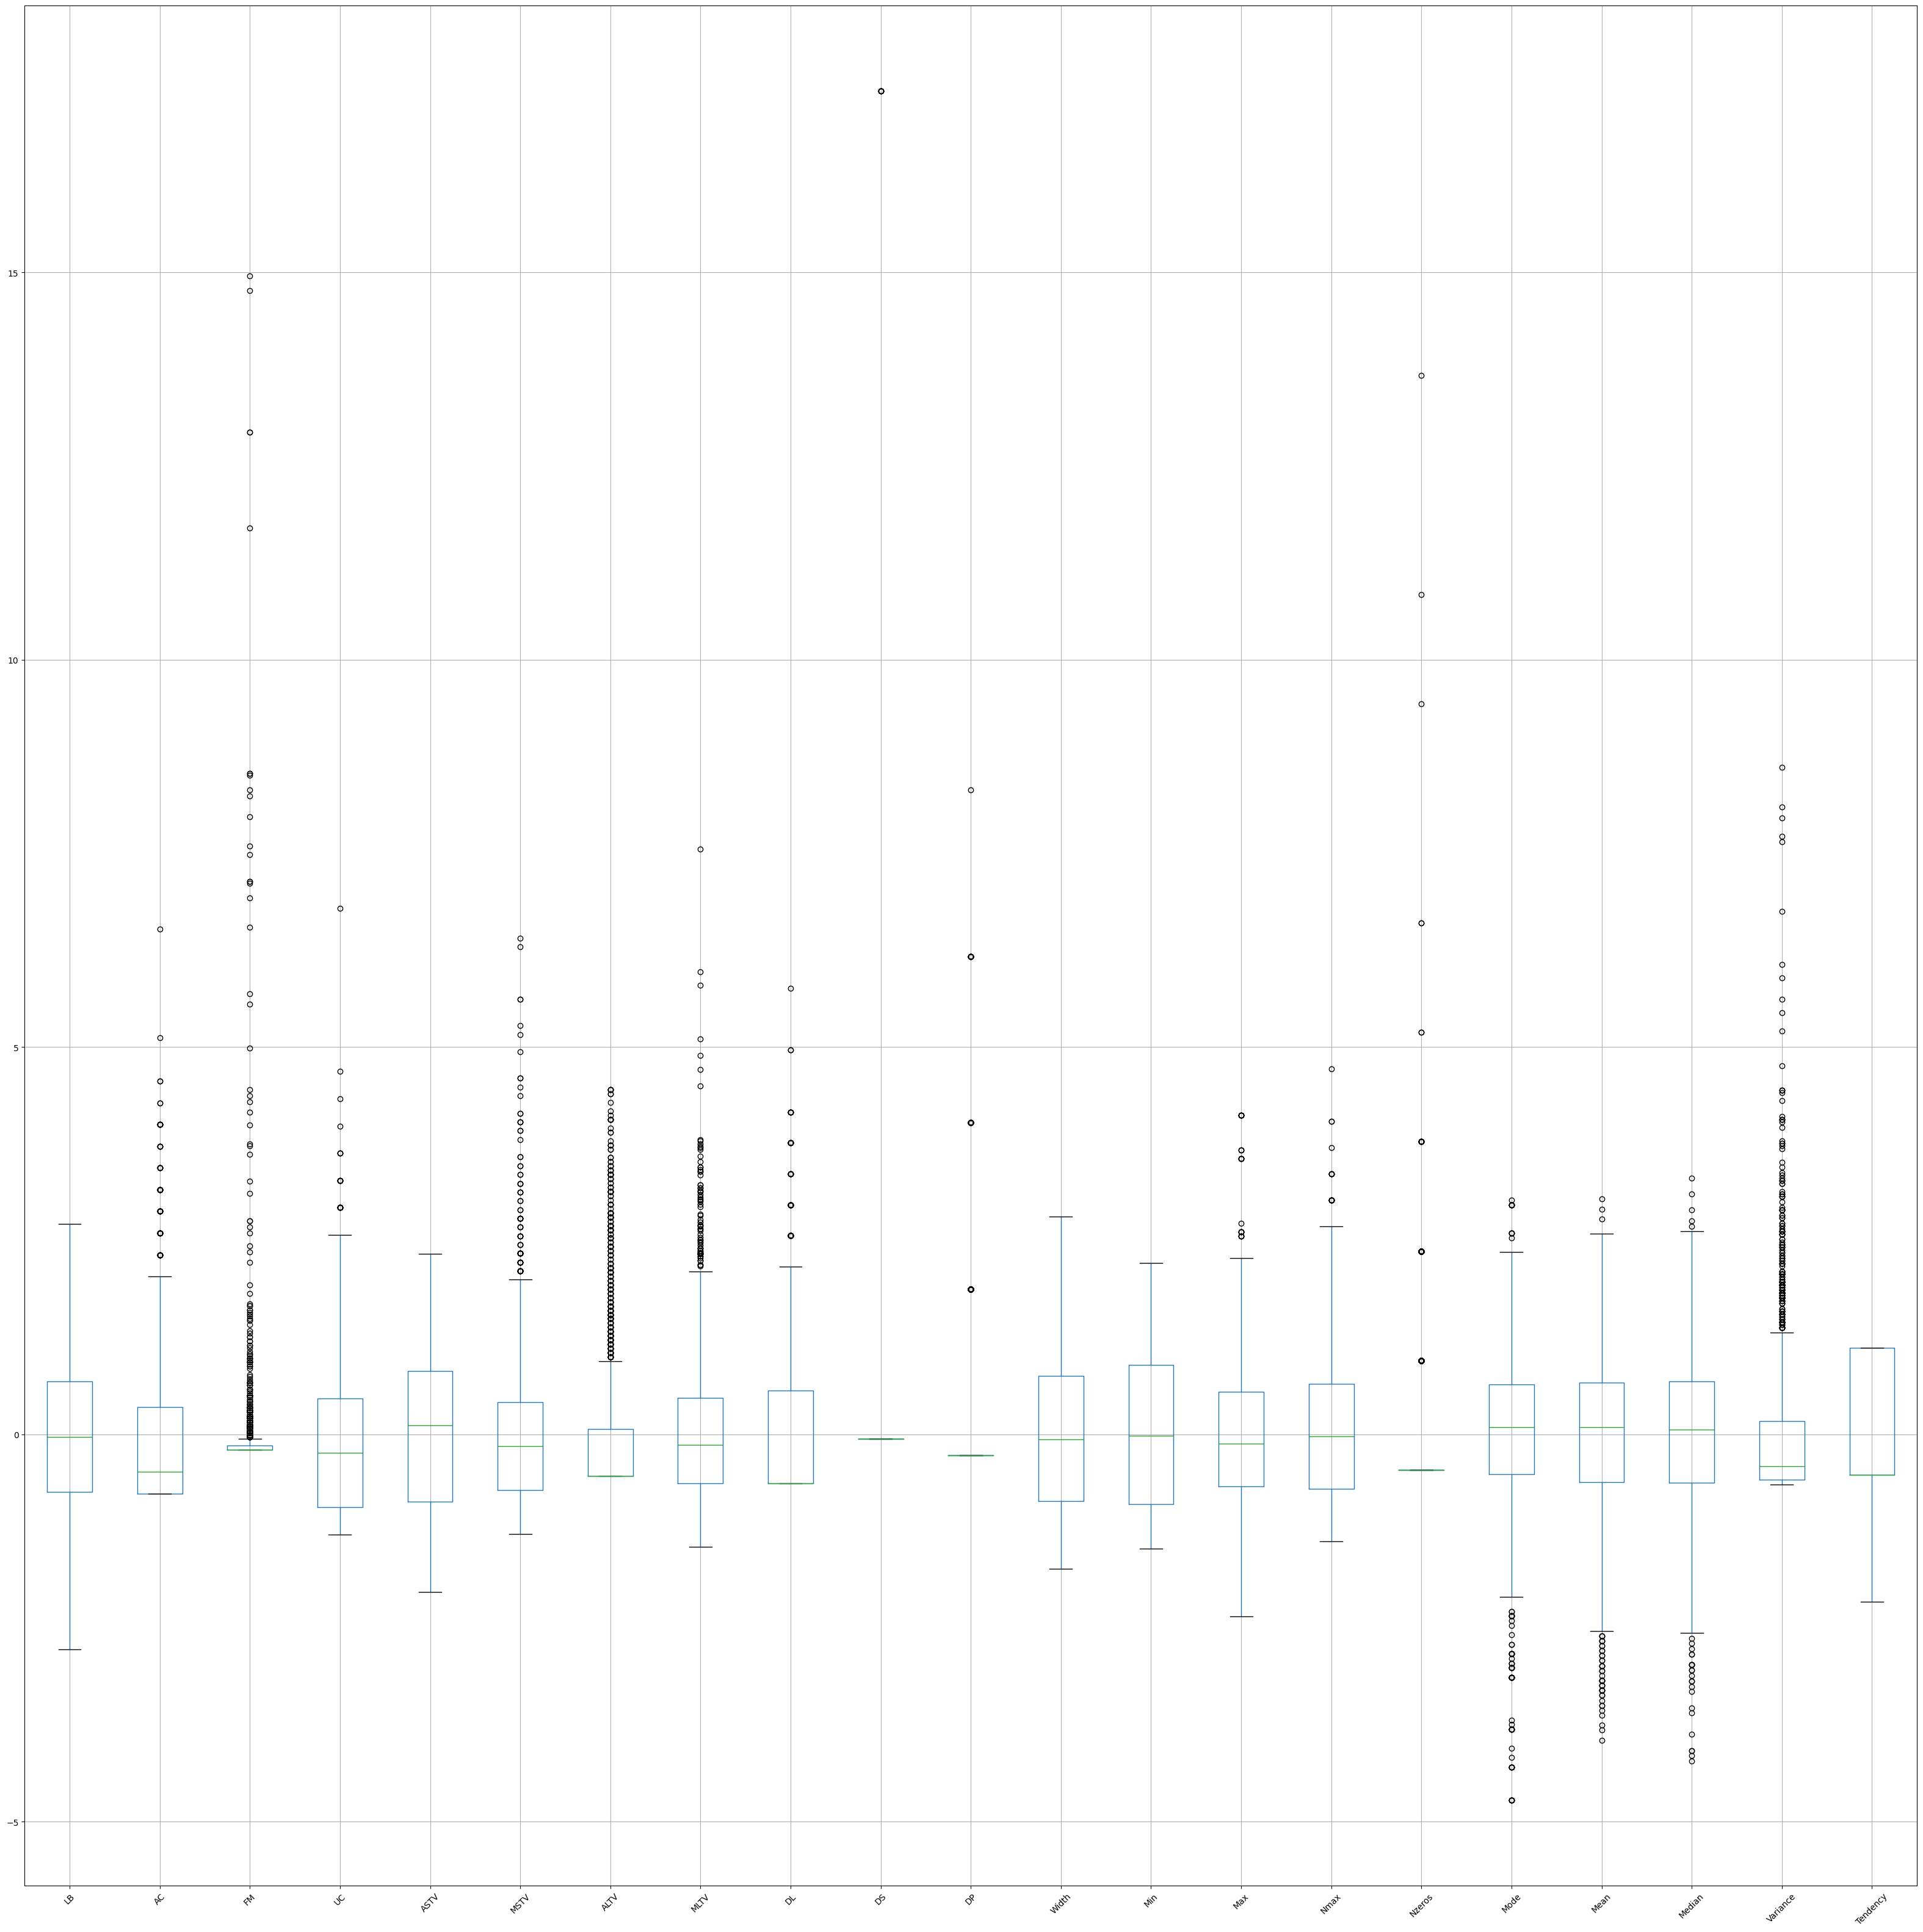

In [38]:
#vediamo il sisultato
fig, ax = plt.subplots(1, 1, figsize=(40, 40))
X_data.boxplot(ax=ax, rot=45)
plt.show()

## Creiamo una funzione che ci da i train test split

In [39]:
def train_split_fun(X, y, train_size, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, train_size=train_size)
    return X_train, X_test, y_train, y_test

## Creiamo una Funzione che ci crea una pipeline con SVC e MLPClassifier per vedere in prima battuta come si comportano settati a default

In [40]:
def creation_pipelines(random_state):
    pipeline_svc=Pipeline([('sv_classifier',SVC(random_state=0))])
    pipeline_MLPClassifier=Pipeline([('MLPClassifier', MLPClassifier(random_state=0))])
    pipelines = [pipeline_svc, pipeline_MLPClassifier]
    pipe_dict = {0: "SVC", 1: "MLPClassifier"}
    return pipelines, pipe_dict

## Eseguiamo la pipeline creata, quindi eseguiamo SVC e MLPClassifier

In [41]:
def run_pipelines(X_train, y_train, pipelines, pipe_dict):
    for pipe in pipelines:
        pipe.fit(X_train, y_train)
    
    cv_results_accuracy = []
    for i, model in enumerate(pipelines):
        cv_score = cross_val_score(model, X_train,y_train, cv=5)
        cv_results_accuracy.append(cv_score)
        print("%s: %f " % (pipe_dict[i], cv_score.mean()))
    return cv_results_accuracy

## Funzione che ci da gli iperparamentri ottimizzati per i modelli

In [42]:
def optimizer_model(model, parameters, X_train, y_train):
    CV_model = GridSearchCV(model, param_grid=parameters, cv= 5,  n_jobs=-1)
    CV_model.fit(X_train, y_train)
    return CV_model

## Funzione che esegue i modelli con gli iperparametri ottimizzati

In [43]:
def run_model(model, optimizer_settings, random_state, X_train, X_test, y_train, y_test):
    optimizer_settings["random_state"] = random_state
    RN_model = model.set_params(**optimizer_settings)
    RN_model.fit(X_train, y_train)
    predictions = RN_model.predict(X_test)
    acccuracy = accuracy_score(y_test,predictions)
    return RN_model, predictions, acccuracy

## Funzione che ci stampa le statistiche: acccuracy, recall, precision, f1_score

In [44]:
def print_stats_model(predictions, y_test):
    acccuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average="weighted")
    precision= precision_score(y_test, predictions, average="weighted")
    f1_s = f1_score(y_test, predictions, average="micro")
    print("Accuracy    : ", acccuracy)
    print("Recall      : ", recall)
    print("Precision   : ", precision)
    print("F1 Score    : ", f1_s)
    return acccuracy, recall, precision, f1_s

## Inizio della creazione dei modelli con il train set al 70% del DataSet

In [45]:
# Splitto in dataset in 70 train e 30 test
X_train7, X_test7, y_train7, y_test7 = train_split_fun(X_data, y, 0.70, 0)
X_train7.T

,171,412,1087,641,1042,1734,270,416,923,805,...,1701,705,1828,1778,277,1033,1731,763,835,1653
LB,-1.454303,0.376688,-1.149138,-1.047416,-0.640529,0.071523,-1.047416,0.987019,-1.149138,1.292184,...,-0.233642,-0.742251,0.376688,-1.250860,-1.352582,-0.843973,0.071523,0.071523,0.478410,-2.369799
AC,-0.486109,-0.766465,-0.486109,-0.766465,0.354958,1.756737,-0.205754,-0.766465,-0.205754,-0.205754,...,1.756737,0.354958,-0.205754,-0.766465,0.635314,-0.486109,1.476381,-0.766465,-0.766465,0.074602
FM,-0.195190,-0.195190,-0.195190,-0.195190,-0.195190,-0.168334,-0.195190,-0.195190,-0.195190,-0.195190,...,-0.114621,-0.034053,-0.141477,-0.168334,-0.195190,-0.195190,-0.168334,-0.195190,-0.195190,-0.195190
UC,-0.238573,-1.293421,-0.238573,-0.941805,0.113043,1.167891,-0.941805,-0.590189,0.464659,-0.590189,...,0.113043,0.464659,1.167891,-0.238573,2.574355,-0.238573,1.871123,-1.293421,-0.238573,1.167891
ASTV,-1.047487,1.574333,-1.513588,1.574333,-0.756173,0.467343,-0.348335,0.991707,-1.222274,-1.105749,...,0.467343,-0.348335,0.642131,1.166495,0.176029,-0.523123,0.583868,1.982172,-0.231809,0.816919
MSTV,-0.040224,-1.171417,0.525373,-1.171417,-0.379582,0.186015,-0.266462,-0.832059,0.186015,0.299134,...,0.638492,0.864730,0.525373,0.864730,0.299134,-0.605820,-0.153343,-1.284536,-0.832059,-0.492701
ALTV,-0.424834,3.352715,-0.424834,2.969485,-0.534329,-0.534329,0.232131,0.889096,-0.315340,-0.534329,...,-0.534329,-0.534329,-0.534329,-0.534329,-0.151099,0.122637,-0.534329,4.447657,2.422015,-0.534329
MLTV,0.431632,-0.740305,1.195167,-0.402929,-0.367416,-1.450570,0.928818,0.609199,0.325093,-0.314146,...,-0.953384,3.130639,-0.402929,-1.450570,-0.012283,0.112013,-1.450570,-1.219734,-0.491712,0.467146
DL,-0.231861,-0.631281,-0.631281,-0.631281,-0.631281,0.966401,-0.631281,-0.631281,0.167560,0.167560,...,-0.231861,0.167560,1.765243,3.762346,0.167560,-0.631281,1.365822,-0.631281,-0.631281,-0.231861
DS,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,...,-0.057666,-0.057666,-0.057666,17.341115,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666


In [46]:
y_train7.T

173     1.0
419     3.0
1098    1.0
648     2.0
1053    1.0
       ... 
1044    1.0
1746    1.0
770     3.0
845     1.0
1668    1.0
Name: NSP, Length: 1478, dtype: float64

## Creazione delle Pipelines e Esecuzione delle stesse

In [47]:
# creo le pipelines con il model SVC e MLPClassifier che mettero a confronto
pipelines, pipe_dict = creation_pipelines(0)
# eseguo una prima analisi tramite i modelli settati a default
cv_results_accuracy7 = run_pipelines(X_train7, y_train7, pipelines, pipe_dict)

C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC: 0.903919 


C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier: 0.912043 


C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Notiamo che **SVC** è inferiore al **MLPClassifier** in quanto ha un accuratezza base più bassa
## Ottimizziamo il Primo modello (SVC)

In [48]:
# ottimizzo il primo modello SVC
model_SVC = SVC(random_state=0)
parameters_SVC = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1,2,3,4,5],
    'gamma': ['scale', 'auto']
}
CV_SVC7 = optimizer_model(model_SVC, parameters_SVC, X_train7, y_train7)
CV_SVC7.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Gli iperparametri ottimi sono {'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
## Eseguiamo il Modello SVC con questi iperparametri

In [49]:
# eseguo la verione ottimizzata del SVC
model_SVC7, predictions_SVC7, acccuracy_SVC7 = run_model(model_SVC, CV_SVC7.best_params_, 0, X_train7, X_test7,  y_train7, y_test7)
acccuracy_SVC7

0.9148264984227129

Notiamo un leggero aumento da **0.903919** a **0.9148264984227129** dopo l'ottimizzazione
## Stampiamo le statistiche di questo SVC ottimo con il Train 70%

In [50]:
print("********* SVC 70 / 30 *********")
acccuracy_SVC7, recall_SVC7, precision_SVC7, f1_score_SVC7 = print_stats_model(predictions_SVC7, y_test7)

********* SVC 70 / 30 *********
Accuracy    :  0.9148264984227129
Recall      :  0.9148264984227129
Precision   :  0.9199588426656151
F1 Score    :  0.9148264984227128


## Passiamo al MLPClassifier e Ottimizzimo gli iperparametri

In [51]:
# ottimizzo il secondo modello MLPClassifier
model_MLPC = MLPClassifier(random_state=0)
parameters_MLPC = {
    'hidden_layer_sizes': [(90),(100)],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'max_iter': [700, 800, 900, 1000]
}
CV_MLPC7 = optimizer_model(model_MLPC, parameters_MLPC, X_train7, y_train7)
CV_MLPC7.best_params_

C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


{'hidden_layer_sizes': 100, 'max_iter': 800, 'solver': 'adam'}

Gli iperparametri ottimi sono {'hidden_layer_sizes': 100, 'max_iter': 800, 'solver': 'adam'}
## Eseguiamo il Modello MLPClassifier con questi iperparametri

In [52]:
# eseguo la verione ottimizzata del MLPClassifier
model_MLPC7, predictions_MLPC7, acccuracy_MLPC7 = run_model(model_MLPC, CV_MLPC7.best_params_, 0, X_train7, X_test7,  y_train7, y_test7)
acccuracy_MLPC7

C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


0.943217665615142

Notiamo un leggero aumento da **0.912043** a **0.943217665615142** dopo l'ottimizzazione
## Stampiamo le statistiche di questo MLPClassifier ottimo con il Train 70%

In [53]:
print("********* MLPClassifier 70 / 30 *********")
acccuracy_MLPC7, recall_MLPC7, precision_MLPC7, f1_score_MLPC7 = print_stats_model(predictions_MLPC7, y_test7)

********* MLPClassifier 70 / 30 *********
Accuracy    :  0.943217665615142
Recall      :  0.943217665615142
Precision   :  0.9443490101413257
F1 Score    :  0.943217665615142


## Cambiamo e vediamo con un Train del 80%

In [54]:
# Splitto in dataset in 80 train e 20 test
X_train8, X_test8, y_train8, y_test8 = train_split_fun(X_data, y, 0.80, 0)
X_train8.T

,1624,578,1296,1628,1710,1063,1101,152,427,1644,...,1701,705,1828,1778,277,1033,1731,763,835,1653
LB,-0.335364,-1.352582,0.478410,-0.335364,0.071523,0.274967,-1.149138,-0.843973,-0.843973,-1.962912,...,-0.233642,-0.742251,0.376688,-1.250860,-1.352582,-0.843973,0.071523,0.071523,0.478410,-2.369799
AC,2.037092,-0.486109,0.074602,0.635314,0.635314,1.476381,-0.766465,0.074602,0.635314,-0.205754,...,1.756737,0.354958,-0.205754,-0.766465,0.635314,-0.486109,1.476381,-0.766465,-0.766465,0.074602
FM,-0.168334,0.046515,-0.195190,-0.168334,-0.168334,-0.195190,-0.195190,-0.195190,-0.195190,-0.195190,...,-0.114621,-0.034053,-0.141477,-0.168334,-0.195190,-0.195190,-0.168334,-0.195190,-0.195190,-0.195190
UC,0.113043,-0.238573,-0.238573,-0.238573,0.816275,1.519507,-1.293421,0.113043,-1.293421,0.464659,...,0.113043,0.464659,1.167891,-0.238573,2.574355,-0.238573,1.871123,-1.293421,-0.238573,1.167891
ASTV,0.292555,-0.290072,-1.105749,0.234292,0.525605,-0.639648,-1.571850,-0.930961,-0.173547,0.816919,...,0.467343,-0.348335,0.642131,1.166495,0.176029,-0.523123,0.583868,1.982172,-0.231809,0.816919
MSTV,-0.040224,-0.266462,0.072896,0.638492,0.299134,-0.153343,0.525373,-0.040224,-0.492701,-0.040224,...,0.638492,0.864730,0.525373,0.864730,0.299134,-0.605820,-0.153343,-1.284536,-0.832059,-0.492701
ALTV,-0.534329,-0.534329,0.341625,-0.534329,-0.534329,0.122637,-0.534329,-0.534329,-0.534329,-0.534329,...,-0.534329,-0.534329,-0.534329,-0.534329,-0.151099,0.122637,-0.534329,4.447657,2.422015,-0.534329
MLTV,-1.024411,0.840035,-1.166464,-0.580495,-1.273004,-0.420686,0.999844,0.555929,-0.083310,1.426003,...,-0.953384,3.130639,-0.402929,-1.450570,-0.012283,0.112013,-1.450570,-1.219734,-0.491712,0.467146
DL,-0.231861,-0.231861,0.566981,1.765243,1.365822,0.966401,-0.231861,-0.631281,-0.631281,-0.631281,...,-0.231861,0.167560,1.765243,3.762346,0.167560,-0.631281,1.365822,-0.631281,-0.631281,-0.231861
DS,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,...,-0.057666,-0.057666,-0.057666,17.341115,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666,-0.057666


In [55]:
y_train8.T

1639    1.0
585     1.0
1310    1.0
1643    1.0
1725    1.0
       ... 
1044    1.0
1746    1.0
770     3.0
845     1.0
1668    1.0
Name: NSP, Length: 1689, dtype: float64

##  Esecuzione delle Pipelines con il Train al 80%

In [56]:
# eseguo una prima analisi tramite i modelli settati a default
cv_results_accuracy8 = run_pipelines(X_train8, y_train8, pipelines, pipe_dict)

C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVC: 0.900530 


C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier: 0.917701 


C:\Users\am95g\miniconda3\envs\MWT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Notiamo che c'è stato una diminuzione e una aumento della accuratezza, in funzione del modello, che passa dal:

SVC: 0.903919  0.900530 

MLPClassifier: 0.912043  0.917701

Anche in questo caso SVC è inferiore a MLPClassifier. 
## Ottimizziamo il Primo modello (SVC) con il Train 80%

In [57]:
# ottimizzo il primo modello SVC
CV_SVC8 = optimizer_model(model_SVC, parameters_SVC, X_train8, y_train8)
CV_SVC8.best_params_

{'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Notiamo che per SVC gli iperparametri ottimi sono uguali a prima (verisone al 70%)

Gli iperparametri ottimi sono {'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

## Eseguiamo il Modello SVC con questi iperparametri

In [58]:
# eseguo la verione ottimizzata del SVC
model_SVC8, predictions_SVC8, acccuracy_SVC8 = run_model(model_SVC, CV_SVC8.best_params_, 0, X_train8, X_test8,  y_train8, y_test8)
acccuracy_SVC8

0.9314420803782506

Notiamo un aumento sostanziale rispetto alla versione non ottimizzata.

La accuratezza passa da **0.900530** a **0.9314420803782506**

Notiamo anche un netto miglioramento rispetto al Train 70% che era **0.9148264984227129** contro l'attuale **0.9314420803782506**
## Stampiamo le statistiche di questo SVC ottimo con il Train 80%

In [59]:
print("********* SVC 80 / 20 *********")
acccuracy_SVC8, recall_SVC8, precision_SVC8, f1_score_SVC8 = print_stats_model(predictions_SVC8, y_test8)

********* SVC 80 / 20 *********
Accuracy    :  0.9314420803782506
Recall      :  0.9314420803782506
Precision   :  0.9343632421875387
F1 Score    :  0.9314420803782506


## Passiamo al MLPClassifier e Ottimizzimo gli iperparametri (Train 80%)

In [60]:
# ottimizzo il secondo modello MLPClassifier
CV_MLPC8 = optimizer_model(model_MLPC, parameters_MLPC, X_train8, y_train8)
CV_MLPC8.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 700, 'solver': 'adam'}

Notiamo che per MLPClassifier gli iperparametri ottimi sono diversi a prima (verisone al 70%)

Prima: {'hidden_layer_sizes': 100, 'max_iter': 800, 'solver': 'adam'}

Ora: {'hidden_layer_sizes': 100, 'max_iter': 700, 'solver': 'adam'}

Gli iperparametri ottimi sono {'hidden_layer_sizes': 100, 'max_iter': 700, 'solver': 'adam'}
## Eseguiamo il Modello MLPClassifier con questi iperparametri

In [61]:
# eseguo la verione ottimizzata del MLPClassifier
model_MLPC8, predictions_MLPC8, acccuracy_MLPC8 = run_model(model_MLPC, CV_MLPC8.best_params_, 0, X_train8, X_test8,  y_train8, y_test8)
acccuracy_MLPC8

0.9621749408983451

Notiamo un aumento sostanziale rispetto alla versione non ottimizzata.

La accuratezza passa da 0.917701 a 0.9621749408983451

Notiamo anche un netto miglioramento rispetto al Train 70% che era 0.943217665615142 contro l'attuale 0.9621749408983451

## Stampiamo le statistiche di questo MLPClassifier ottimo con il Train 80%

In [62]:
print("********* MLPClassifier 80 / 20 *********")
acccuracy_MLPC8, recall_MLPC8, precision_MLPC8, f1_score_MLPC8 = print_stats_model(predictions_MLPC8, y_test8)

********* MLPClassifier 80 / 20 *********
Accuracy    :  0.9621749408983451
Recall      :  0.9621749408983451
Precision   :  0.9618633955526846
F1 Score    :  0.9621749408983451


## Vediamo un veloce recap di tutte le statistiche dei due modelli  in funzione del Train

In [63]:
print("********* SVC - 70 / 30 *********")
print(classification_report(y_test7, predictions_SVC7))
print("\n")
print("********* SVC - 80 / 20 *********")
print(classification_report(y_test8, predictions_SVC8))
print("\n\n\n\n")
print("********* MLPClassifier - 70 / 30 *********")
print(classification_report(y_test7, predictions_MLPC7))
print("\n")
print("********* MLPClassifier - 80 / 20 *********")
print(classification_report(y_test8, predictions_MLPC8))

********* SVC - 70 / 30 *********
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       507
         2.0       0.67      0.75      0.70        75
         3.0       1.00      0.73      0.84        52

    accuracy                           0.91       634
   macro avg       0.87      0.81      0.83       634
weighted avg       0.92      0.91      0.92       634



********* SVC - 80 / 20 *********
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       337
         2.0       0.73      0.79      0.76        52
         3.0       1.00      0.76      0.87        34

    accuracy                           0.93       423
   macro avg       0.90      0.84      0.86       423
weighted avg       0.93      0.93      0.93       423






********* MLPClassifier - 70 / 30 *********
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       507
         2

## vediamo le confusion matrix dei modelli

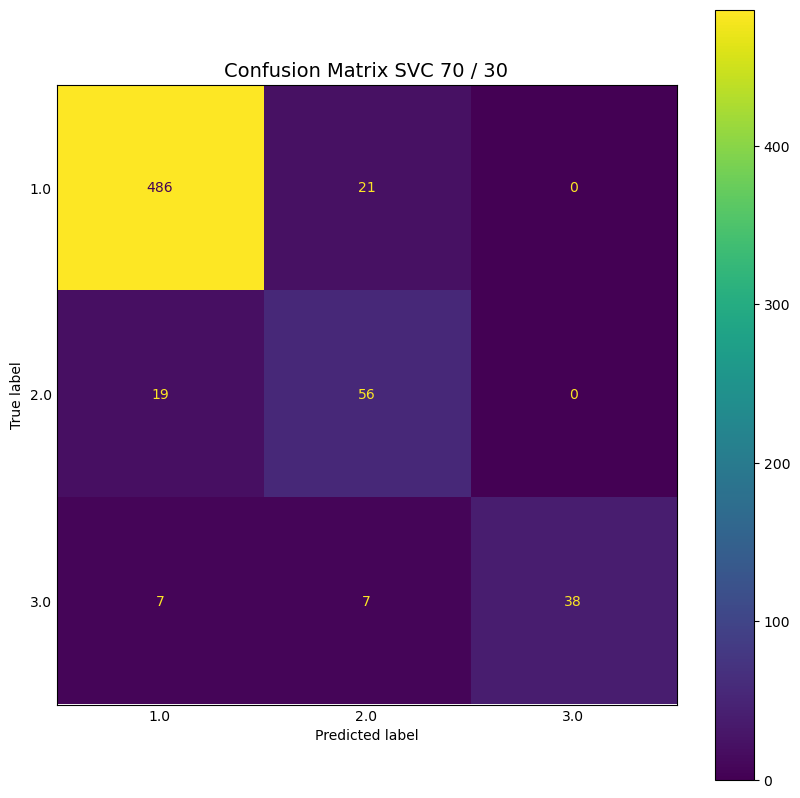

In [64]:
# confusion matrix SVC 7
cm_SVC7 = confusion_matrix(y_test7, predictions_SVC7, labels = CV_SVC7.classes_)
cm_display_SVC7 = ConfusionMatrixDisplay(confusion_matrix = cm_SVC7, display_labels = CV_SVC7.classes_)
fig, ax = plt.subplots(figsize=(10,10))
cm_display_SVC7.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Confusion Matrix SVC 70 / 30', fontsize=14)
plt.grid(False)
plt.show()

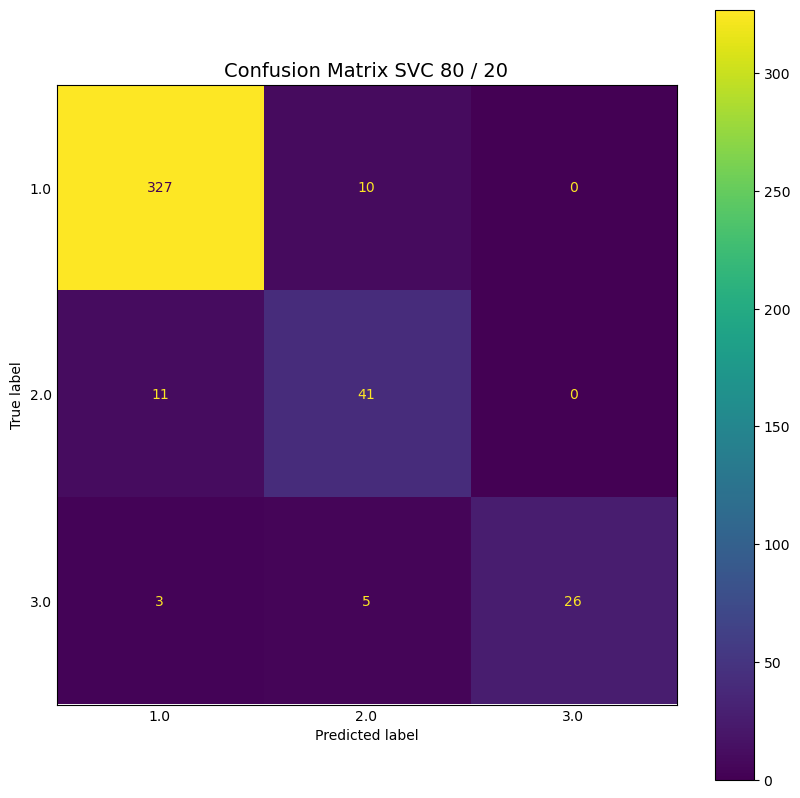

In [65]:
# confusion matrix SVC 8
cm_SVC8 = confusion_matrix(y_test8, predictions_SVC8, labels = CV_SVC8.classes_)
cm_display_SVC8 = ConfusionMatrixDisplay(confusion_matrix = cm_SVC8, display_labels = CV_SVC8.classes_)
fig, ax = plt.subplots(figsize=(10,10))
cm_display_SVC8.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Confusion Matrix SVC 80 / 20', fontsize=14)
plt.grid(False)
plt.show()

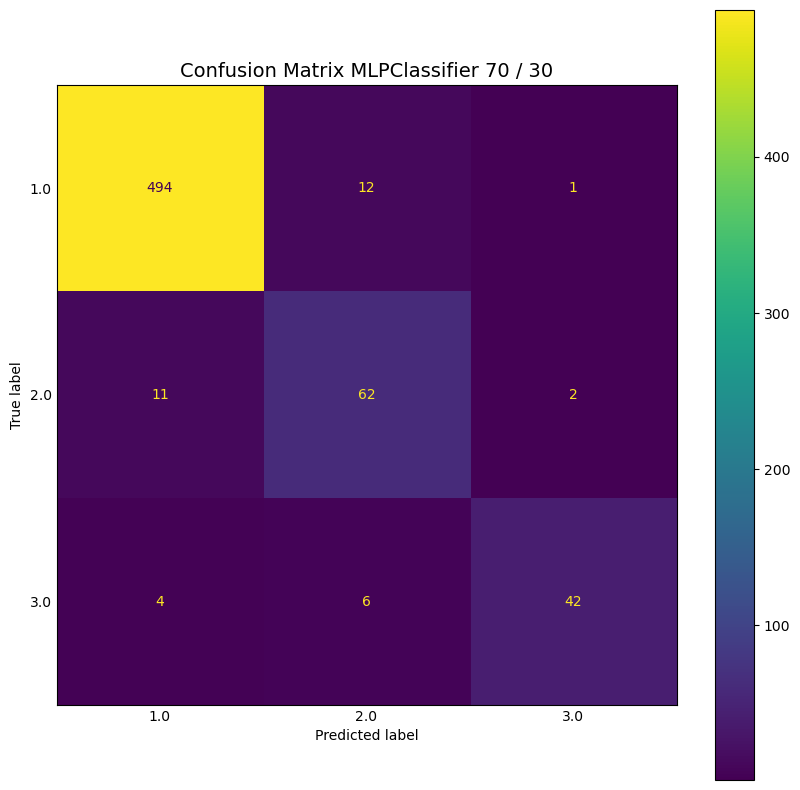

In [66]:
# confusion matrix MLPC 7
cm_MLPC7 = confusion_matrix(y_test7, predictions_MLPC7, labels = CV_MLPC7.classes_)
cm_display_MLPC7 = ConfusionMatrixDisplay(confusion_matrix = cm_MLPC7, display_labels = CV_MLPC7.classes_)
fig, ax = plt.subplots(figsize=(10,10))
cm_display_MLPC7.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Confusion Matrix MLPClassifier 70 / 30', fontsize=14)
plt.grid(False)
plt.show()

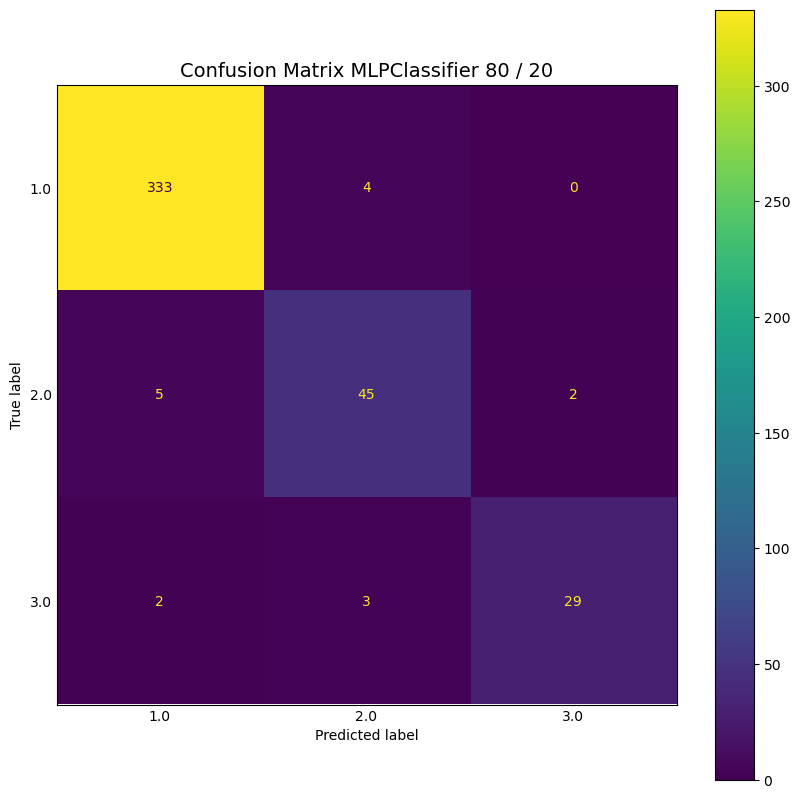

In [67]:
# confusion matrix MLPC 8
cm_MLPC8 = confusion_matrix(y_test8, predictions_MLPC8, labels = CV_MLPC8.classes_)
cm_display_MLPC8 = ConfusionMatrixDisplay(confusion_matrix = cm_MLPC8, display_labels = CV_MLPC8.classes_)
fig, ax = plt.subplots(figsize=(10,10))
cm_display_MLPC8.plot(ax=ax)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Confusion Matrix MLPClassifier 80 / 20', fontsize=14)
plt.grid(False)
plt.show()